In [335]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [336]:
df_train=pd.read_csv(r"C:\Users\visha\Machine Learning Tools\House_price_prediction_kaggle\train (1).csv")
df_test=pd.read_csv(r"C:\Users\visha\Machine Learning Tools\House_price_prediction_kaggle\test.csv")

In [337]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [338]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [339]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [340]:
df_train.shape, df_test.shape

((1460, 81), (1459, 80))

## Missing Value Stats

In [341]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [342]:
df_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [343]:
train_missing=[feature for feature in df_train.columns if df_train[feature].isnull().sum()>0]

In [344]:
test_missing=[feature for feature in df_test.columns if df_test[feature].isnull().sum()>0]

In [345]:
[(x, (df_train[x].isnull().sum()/df_train.shape[0])*100) for x in train_missing ]

[('LotFrontage', 17.73972602739726),
 ('Alley', 93.76712328767123),
 ('MasVnrType', 0.547945205479452),
 ('MasVnrArea', 0.547945205479452),
 ('BsmtQual', 2.5342465753424657),
 ('BsmtCond', 2.5342465753424657),
 ('BsmtExposure', 2.6027397260273974),
 ('BsmtFinType1', 2.5342465753424657),
 ('BsmtFinType2', 2.6027397260273974),
 ('Electrical', 0.0684931506849315),
 ('FireplaceQu', 47.26027397260274),
 ('GarageType', 5.5479452054794525),
 ('GarageYrBlt', 5.5479452054794525),
 ('GarageFinish', 5.5479452054794525),
 ('GarageQual', 5.5479452054794525),
 ('GarageCond', 5.5479452054794525),
 ('PoolQC', 99.52054794520548),
 ('Fence', 80.75342465753424),
 ('MiscFeature', 96.30136986301369)]

In [346]:
[(x, (df_test[x].isnull().sum()/df_test.shape[0])*100) for x in test_missing ]

[('MSZoning', 0.2741603838245374),
 ('LotFrontage', 15.558601782042494),
 ('Alley', 92.66620973269363),
 ('Utilities', 0.1370801919122687),
 ('Exterior1st', 0.06854009595613435),
 ('Exterior2nd', 0.06854009595613435),
 ('MasVnrType', 1.0966415352981496),
 ('MasVnrArea', 1.0281014393420151),
 ('BsmtQual', 3.015764222069911),
 ('BsmtCond', 3.0843043180260454),
 ('BsmtExposure', 3.015764222069911),
 ('BsmtFinType1', 2.878684030157642),
 ('BsmtFinSF1', 0.06854009595613435),
 ('BsmtFinType2', 2.878684030157642),
 ('BsmtFinSF2', 0.06854009595613435),
 ('BsmtUnfSF', 0.06854009595613435),
 ('TotalBsmtSF', 0.06854009595613435),
 ('BsmtFullBath', 0.1370801919122687),
 ('BsmtHalfBath', 0.1370801919122687),
 ('KitchenQual', 0.06854009595613435),
 ('Functional', 0.1370801919122687),
 ('FireplaceQu', 50.03427004797807),
 ('GarageType', 5.20904729266621),
 ('GarageYrBlt', 5.346127484578479),
 ('GarageFinish', 5.346127484578479),
 ('GarageCars', 0.06854009595613435),
 ('GarageArea', 0.0685400959561343

In [347]:
for x in train_missing:
    if (df_train[x].isnull().sum()/df_train.shape[0])*100>75:
        df_train.drop(x,axis=1,inplace=True)
        df_test.drop(x,axis=1,inplace=True)
        


In [348]:
df_train.shape, df_test.shape

((1460, 77), (1459, 76))

In [349]:
train_missing=[feature for feature in df_train.columns if df_train[feature].isnull().sum()>0]
[(x, (df_train[x].isnull().sum()/df_train.shape[0])*100,df_train[x].isnull().sum())  for x in train_missing ]

[('LotFrontage', 17.73972602739726, 259),
 ('MasVnrType', 0.547945205479452, 8),
 ('MasVnrArea', 0.547945205479452, 8),
 ('BsmtQual', 2.5342465753424657, 37),
 ('BsmtCond', 2.5342465753424657, 37),
 ('BsmtExposure', 2.6027397260273974, 38),
 ('BsmtFinType1', 2.5342465753424657, 37),
 ('BsmtFinType2', 2.6027397260273974, 38),
 ('Electrical', 0.0684931506849315, 1),
 ('FireplaceQu', 47.26027397260274, 690),
 ('GarageType', 5.5479452054794525, 81),
 ('GarageYrBlt', 5.5479452054794525, 81),
 ('GarageFinish', 5.5479452054794525, 81),
 ('GarageQual', 5.5479452054794525, 81),
 ('GarageCond', 5.5479452054794525, 81)]

In [350]:
test_missing=[feature for feature in df_test.columns if df_test[feature].isnull().sum()>0]
[(x, (df_test[x].isnull().sum()/df_test.shape[0])*100,df_test[x].isnull().sum()) for x in test_missing ]

[('MSZoning', 0.2741603838245374, 4),
 ('LotFrontage', 15.558601782042494, 227),
 ('Utilities', 0.1370801919122687, 2),
 ('Exterior1st', 0.06854009595613435, 1),
 ('Exterior2nd', 0.06854009595613435, 1),
 ('MasVnrType', 1.0966415352981496, 16),
 ('MasVnrArea', 1.0281014393420151, 15),
 ('BsmtQual', 3.015764222069911, 44),
 ('BsmtCond', 3.0843043180260454, 45),
 ('BsmtExposure', 3.015764222069911, 44),
 ('BsmtFinType1', 2.878684030157642, 42),
 ('BsmtFinSF1', 0.06854009595613435, 1),
 ('BsmtFinType2', 2.878684030157642, 42),
 ('BsmtFinSF2', 0.06854009595613435, 1),
 ('BsmtUnfSF', 0.06854009595613435, 1),
 ('TotalBsmtSF', 0.06854009595613435, 1),
 ('BsmtFullBath', 0.1370801919122687, 2),
 ('BsmtHalfBath', 0.1370801919122687, 2),
 ('KitchenQual', 0.06854009595613435, 1),
 ('Functional', 0.1370801919122687, 2),
 ('FireplaceQu', 50.03427004797807, 730),
 ('GarageType', 5.20904729266621, 76),
 ('GarageYrBlt', 5.346127484578479, 78),
 ('GarageFinish', 5.346127484578479, 78),
 ('GarageCars', 0

## Categorical Variable Separation

In [351]:
train_categorical=[feature for feature in df_train.columns if df_train[feature].dtypes=="object"]

In [352]:
test_categorical=[feature for feature in df_test.columns if df_test[feature].dtypes=="object"]

In [353]:
train_numerical=[feature for feature in df_train.columns if df_train[feature].dtypes!="object"]
test_numerical=[feature for feature in df_test.columns if df_test[feature].dtypes!="object"]

## Imputation of Training Data Column-Wise

## Imputation of 'LotFrontage'

In [354]:
i=train_missing[0]
print(i)
print(df_train[i].nunique())
print("-----------------------------------------------------------------------------------------------------")
print(df_train[i].unique())
print("-----------------------------------------------------------------------------------------------------")
print(df_train[i].value_counts().index)
print("-----------------------------------------------------------------------------------------------------")
print(df_train[i].value_counts().values)
print("||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")

LotFrontage
110
-----------------------------------------------------------------------------------------------------
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
-----------------------------------------------------------------------------------------------------
Float64Index([ 60.0,  70.0,  80.0,  50.0,  75.0,  65.0,  85.0,  78.0,  21.0,
               90.0,
              ...
              160.0, 168.0, 128.0, 144.0,  39.0, 106.0,  38.0, 138.0, 140.0,
              137.0],
 

In [355]:
corelation_matrix=df_train.corr()
corelation_LotFrontage=corelation_matrix["LotFrontage"]
corelation_LotFrontage

Id              -0.010601
MSSubClass      -0.386347
LotFrontage      1.000000
LotArea          0.426095
OverallQual      0.251646
OverallCond     -0.059213
YearBuilt        0.123349
YearRemodAdd     0.088866
MasVnrArea       0.193458
BsmtFinSF1       0.233633
BsmtFinSF2       0.049900
BsmtUnfSF        0.132644
TotalBsmtSF      0.392075
1stFlrSF         0.457181
2ndFlrSF         0.080177
LowQualFinSF     0.038469
GrLivArea        0.402797
BsmtFullBath     0.100949
BsmtHalfBath    -0.007234
FullBath         0.198769
HalfBath         0.053532
BedroomAbvGr     0.263170
KitchenAbvGr    -0.006069
TotRmsAbvGrd     0.352096
Fireplaces       0.266639
GarageYrBlt      0.070250
GarageCars       0.285691
GarageArea       0.344997
WoodDeckSF       0.088521
OpenPorchSF      0.151972
EnclosedPorch    0.010700
3SsnPorch        0.070029
ScreenPorch      0.041383
PoolArea         0.206167
MiscVal          0.003368
MoSold           0.011200
YrSold           0.007450
SalePrice        0.351799
Name: LotFro

In [356]:
i=train_missing[1]
print(i)
print(df_train[i].nunique())
print("-----------------------------------------------------------------------------------------------------")
print(df_train[i].unique())
print("-----------------------------------------------------------------------------------------------------")
print(df_train[i].value_counts().index)
print("-----------------------------------------------------------------------------------------------------")
print(df_train[i].value_counts().values)
print("||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")

i=train_missing[2]
print(i)
print(df_train[i].nunique())
print("-----------------------------------------------------------------------------------------------------")
print(df_train[i].unique())
print("-----------------------------------------------------------------------------------------------------")
print(df_train[i].value_counts().index)
print("-----------------------------------------------------------------------------------------------------")
print(df_train[i].value_counts().values)
print("||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")

MasVnrType
4
-----------------------------------------------------------------------------------------------------
['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
-----------------------------------------------------------------------------------------------------
Index(['None', 'BrkFace', 'Stone', 'BrkCmn'], dtype='object')
-----------------------------------------------------------------------------------------------------
[864 445 128  15]
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
MasVnrArea
327
-----------------------------------------------------------------------------------------------------
[1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.680e+02 6.600e

In [357]:
df_train.groupby("MasVnrType").MasVnrArea.mean()

MasVnrType
BrkCmn     247.666667
BrkFace    259.008989
None         1.094907
Stone      239.304688
Name: MasVnrArea, dtype: float64

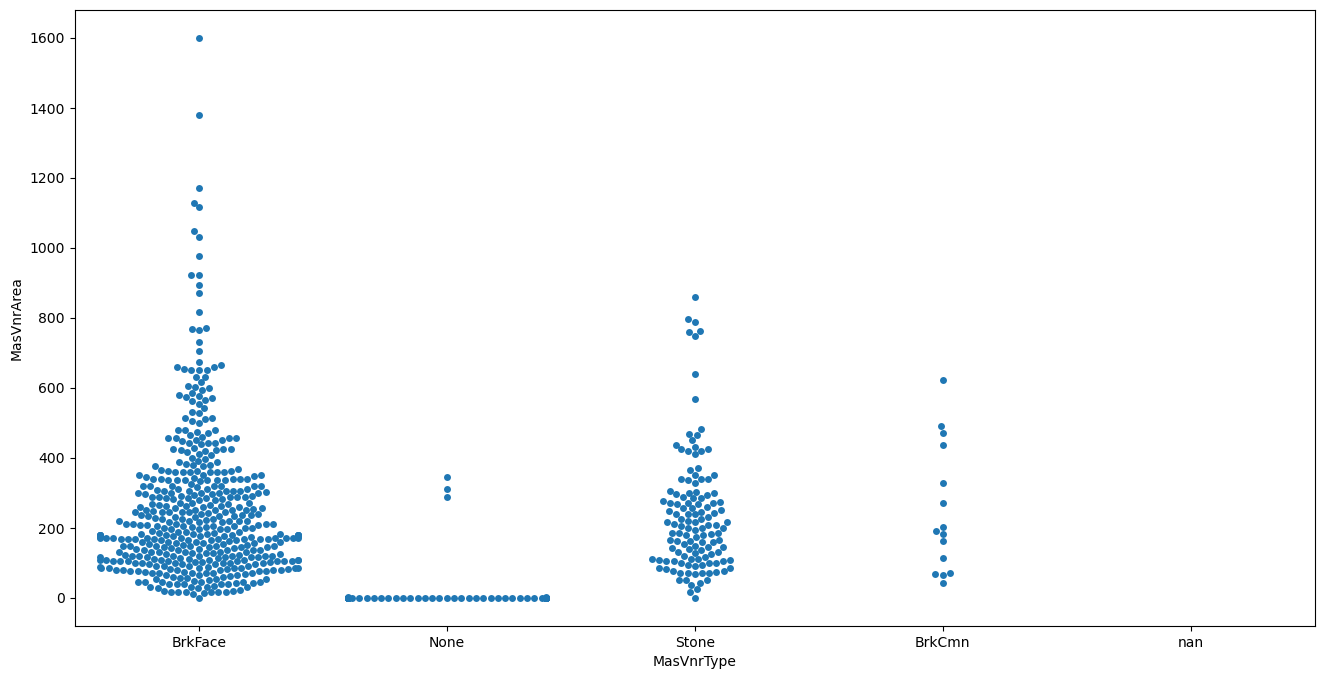

In [358]:
plt.figure(figsize=(16,8))

sns.swarmplot(df_train,x="MasVnrType",y="MasVnrArea")
plt.show()

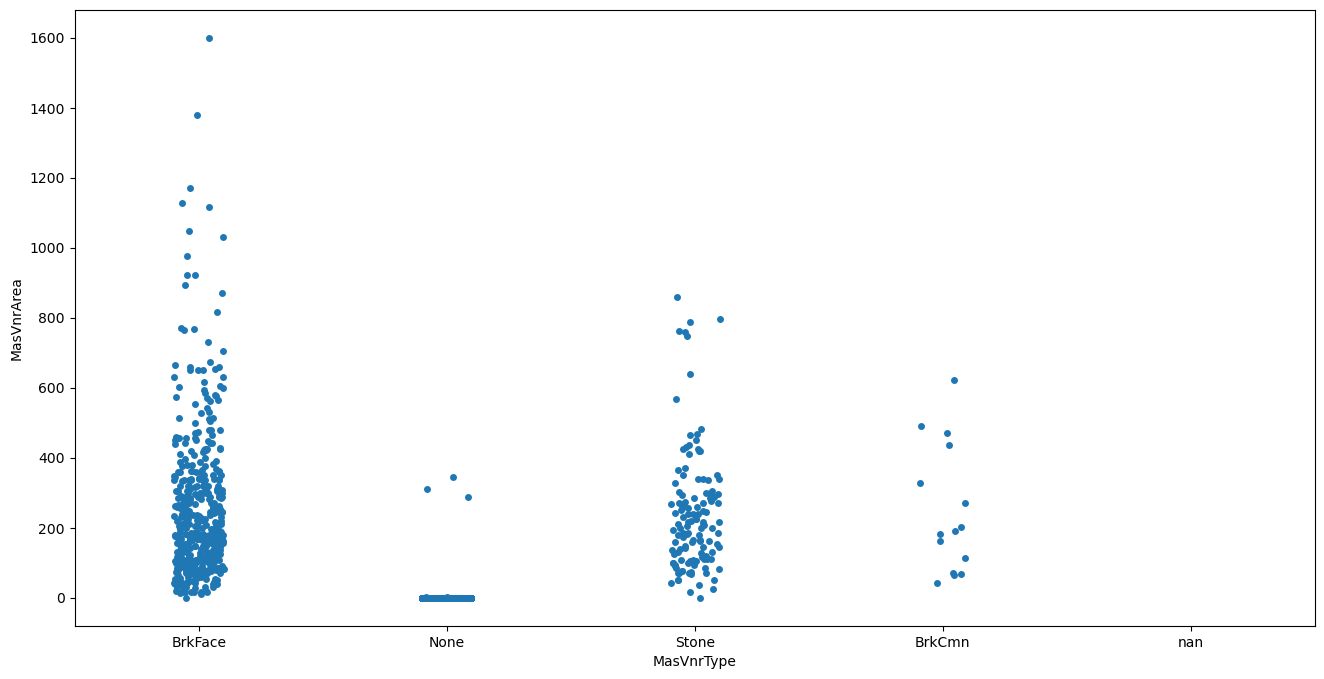

In [359]:
plt.figure(figsize=(16,8))

sns.stripplot(df_train,x="MasVnrType",y="MasVnrArea")
plt.show()

# SimpleImputer

In [360]:
from sklearn.impute import SimpleImputer
si_MasVnrType=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
si_MasVnrType.fit(df_train["MasVnrType"].values.reshape(-1,1))
df_train["MasVnrType"]=si_MasVnrType.transform(df_train["MasVnrType"].values.reshape(-1,1))
df_test["MasVnrType"]=si_MasVnrType.transform(df_test["MasVnrType"].values.reshape(-1,1))

In [361]:
df_train["MasVnrArea"]=df_train["MasVnrArea"].fillna(1)

In [362]:
df_test["MasVnrArea"]=df_test["MasVnrArea"].fillna(1)

# All or Any isnull()

In [363]:
def fn_all_any(rows):
    if rows.isnull().all():
        return "missing"
    elif rows.isnull().any():
        return "some missing"
    else:
        return "not_missing"

    

In [364]:
train_missing=[feature for feature in df_train.columns if df_train[feature].isnull().sum()>0]
[(x, (df_train[x].isnull().sum()/df_train.shape[0])*100,df_train[x].isnull().sum())  for x in train_missing ]

[('LotFrontage', 17.73972602739726, 259),
 ('BsmtQual', 2.5342465753424657, 37),
 ('BsmtCond', 2.5342465753424657, 37),
 ('BsmtExposure', 2.6027397260273974, 38),
 ('BsmtFinType1', 2.5342465753424657, 37),
 ('BsmtFinType2', 2.6027397260273974, 38),
 ('Electrical', 0.0684931506849315, 1),
 ('FireplaceQu', 47.26027397260274, 690),
 ('GarageType', 5.5479452054794525, 81),
 ('GarageYrBlt', 5.5479452054794525, 81),
 ('GarageFinish', 5.5479452054794525, 81),
 ('GarageQual', 5.5479452054794525, 81),
 ('GarageCond', 5.5479452054794525, 81)]

In [365]:
df_train[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']]=df_train[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna("xyz")

In [366]:
df_test[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']]=df_test[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna("xyz")

In [367]:
test_missing=[feature for feature in df_test.columns if df_test[feature].isnull().sum()>0]
[(x, (df_test[x].isnull().sum()/df_test.shape[0])*100,df_test[x].isnull().sum()) for x in test_missing ]

[('MSZoning', 0.2741603838245374, 4),
 ('LotFrontage', 15.558601782042494, 227),
 ('Utilities', 0.1370801919122687, 2),
 ('Exterior1st', 0.06854009595613435, 1),
 ('Exterior2nd', 0.06854009595613435, 1),
 ('BsmtFinSF1', 0.06854009595613435, 1),
 ('BsmtFinSF2', 0.06854009595613435, 1),
 ('BsmtUnfSF', 0.06854009595613435, 1),
 ('TotalBsmtSF', 0.06854009595613435, 1),
 ('BsmtFullBath', 0.1370801919122687, 2),
 ('BsmtHalfBath', 0.1370801919122687, 2),
 ('KitchenQual', 0.06854009595613435, 1),
 ('Functional', 0.1370801919122687, 2),
 ('FireplaceQu', 50.03427004797807, 730),
 ('GarageType', 5.20904729266621, 76),
 ('GarageYrBlt', 5.346127484578479, 78),
 ('GarageFinish', 5.346127484578479, 78),
 ('GarageCars', 0.06854009595613435, 1),
 ('GarageArea', 0.06854009595613435, 1),
 ('GarageQual', 5.346127484578479, 78),
 ('GarageCond', 5.346127484578479, 78),
 ('SaleType', 0.06854009595613435, 1)]

In [368]:
df=df_train[['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']].apply(fn_all_any,axis=1)
df

0       not_missing
1       not_missing
2       not_missing
3       not_missing
4       not_missing
           ...     
1455    not_missing
1456    not_missing
1457    not_missing
1458    not_missing
1459    not_missing
Length: 1460, dtype: object

In [369]:
df.value_counts()

not_missing    1379
missing          81
dtype: int64

In [370]:
for i in ['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']:
    print(df_train[i].value_counts().index)
    print(df_train[i].dtypes,".........................................")

Index(['Attchd', 'Detchd', 'BuiltIn', 'Basment', 'CarPort', '2Types'], dtype='object')
object .........................................
Float64Index([2005.0, 2006.0, 2004.0, 2003.0, 2007.0, 1977.0, 1998.0, 1999.0,
              2008.0, 1976.0, 2000.0, 2002.0, 1968.0, 1950.0, 1993.0, 2009.0,
              1965.0, 1966.0, 1962.0, 1958.0, 2001.0, 1996.0, 1957.0, 1970.0,
              1960.0, 1997.0, 1978.0, 1954.0, 1974.0, 1994.0, 1995.0, 1964.0,
              1959.0, 1963.0, 1990.0, 1956.0, 1969.0, 1979.0, 1980.0, 1967.0,
              1988.0, 1973.0, 1940.0, 1920.0, 1972.0, 1961.0, 1971.0, 1955.0,
              1992.0, 1953.0, 1987.0, 1948.0, 1985.0, 1981.0, 1941.0, 1925.0,
              1989.0, 1975.0, 1991.0, 1939.0, 1984.0, 1949.0, 1930.0, 1983.0,
              1986.0, 1951.0, 1926.0, 1922.0, 1936.0, 1916.0, 1931.0, 1945.0,
              1935.0, 1928.0, 1946.0, 1982.0, 1938.0, 1921.0, 1924.0, 1910.0,
              1952.0, 1932.0, 2010.0, 1923.0, 1937.0, 1934.0, 1918.0, 1947.0,
      

In [371]:
df_train[['GarageType','GarageFinish','GarageQual','GarageCond']]=df_train[['GarageType','GarageFinish','GarageQual','GarageCond']].fillna("abc")

In [372]:
df_test[['GarageType','GarageFinish','GarageQual','GarageCond']]=df_test[['GarageType','GarageFinish','GarageQual','GarageCond']].fillna("abc")

In [373]:
df_train['GarageYrBlt']=df_train['GarageYrBlt'].fillna(1901.0)
df_test['GarageYrBlt']=df_test['GarageYrBlt'].fillna(1901.0)

In [374]:
i="Electrical"
print(i)
print(df_train[i].nunique())
print("-----------------------------------------------------------------------------------------------------")
print(df_train[i].unique())
print("-----------------------------------------------------------------------------------------------------")
print(df_train[i].value_counts().index)
print("-----------------------------------------------------------------------------------------------------")
print(df_train[i].value_counts().values)

Electrical
5
-----------------------------------------------------------------------------------------------------
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
-----------------------------------------------------------------------------------------------------
Index(['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix'], dtype='object')
-----------------------------------------------------------------------------------------------------
[1334   94   27    3    1]


In [375]:
df_train["Electrical"]=df_train["Electrical"].fillna('SBrkr')
df_test["Electrical"]=df_test["Electrical"].fillna('SBrkr')

In [376]:
df_train.drop("FireplaceQu",axis=1, inplace=True)
df_test.drop("FireplaceQu",axis=1, inplace=True)

In [377]:
test_missing=[feature for feature in df_test.columns if df_test[feature].isnull().sum()>0]

In [378]:
cor=df_train.corr()
cor1=cor['LotFrontage']
print(cor1)

Id              -0.010601
MSSubClass      -0.386347
LotFrontage      1.000000
LotArea          0.426095
OverallQual      0.251646
OverallCond     -0.059213
YearBuilt        0.123349
YearRemodAdd     0.088866
MasVnrArea       0.192418
BsmtFinSF1       0.233633
BsmtFinSF2       0.049900
BsmtUnfSF        0.132644
TotalBsmtSF      0.392075
1stFlrSF         0.457181
2ndFlrSF         0.080177
LowQualFinSF     0.038469
GrLivArea        0.402797
BsmtFullBath     0.100949
BsmtHalfBath    -0.007234
FullBath         0.198769
HalfBath         0.053532
BedroomAbvGr     0.263170
KitchenAbvGr    -0.006069
TotRmsAbvGrd     0.352096
Fireplaces       0.266639
GarageYrBlt      0.115356
GarageCars       0.285691
GarageArea       0.344997
WoodDeckSF       0.088521
OpenPorchSF      0.151972
EnclosedPorch    0.010700
3SsnPorch        0.070029
ScreenPorch      0.041383
PoolArea         0.206167
MiscVal          0.003368
MoSold           0.011200
YrSold           0.007450
SalePrice        0.351799
Name: LotFro

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

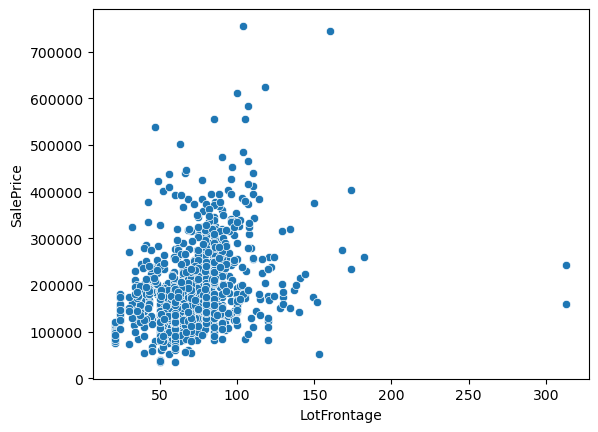

In [379]:
sns.scatterplot(df_train,x="LotFrontage",y="SalePrice")

In [380]:
a=np.array([ 65.,  80. , 68. , 60.  ,84.  ,85.  ,75.])
b=np.array([143 , 70,  69,  57,  53,  44,  40 ])
mean_imp=(a*b).sum()/b.sum()
print(mean_imp)

71.84663865546219


In [381]:
df_train['LotFrontage']=df_train['LotFrontage'].fillna(71.8)
df_test['LotFrontage']=df_test['LotFrontage'].fillna(71.8)

In [382]:
from sklearn.impute import SimpleImputer
for i in test_missing:
    si=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
    df_test[i]=si.fit_transform(df_test[i].values.reshape(-1,1))
    

In [383]:
df_train.shape, df_test.shape

((1460, 76), (1459, 75))

## Outlier Preprocessing

Id


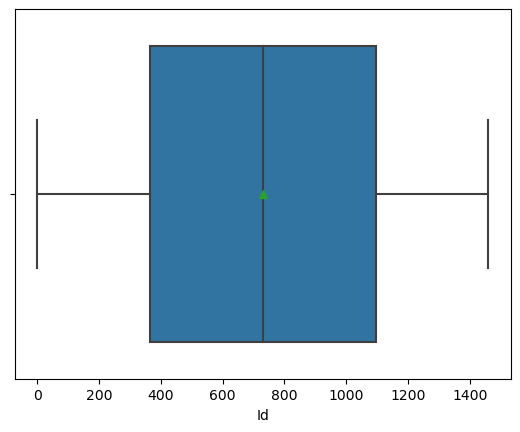

MSSubClass


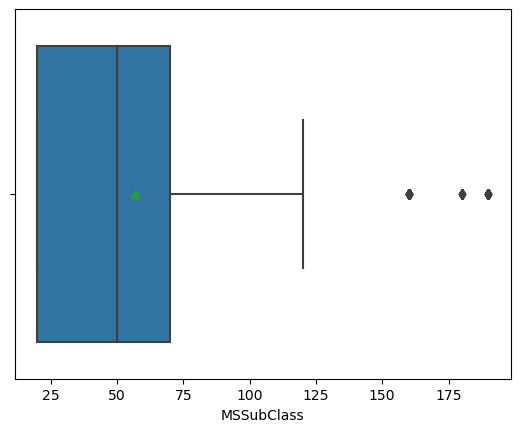

LotFrontage


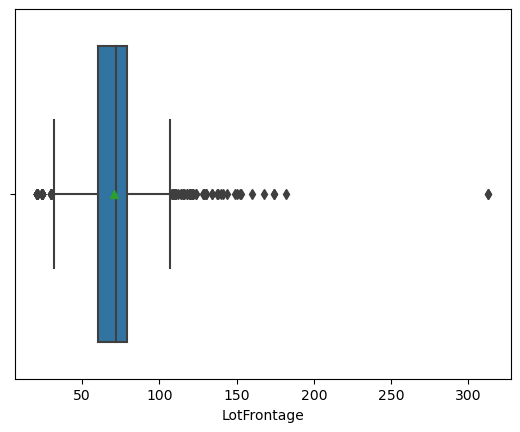

LotArea


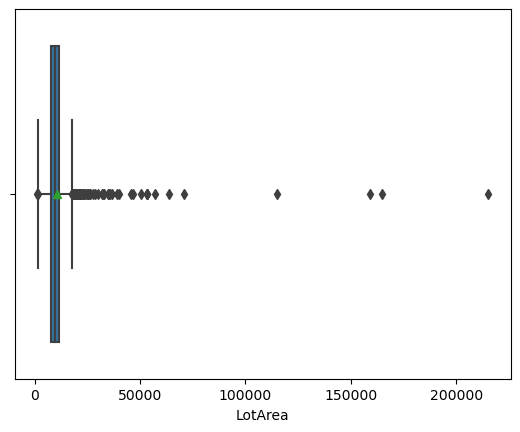

OverallQual


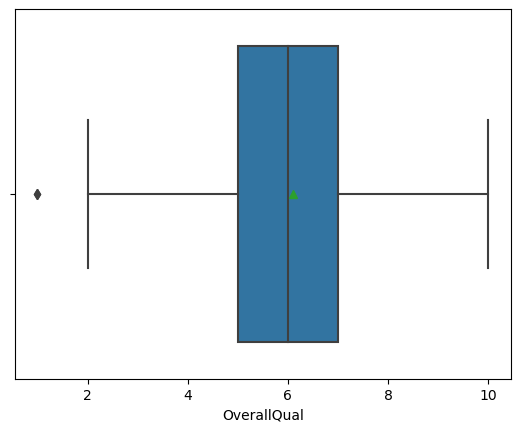

OverallCond


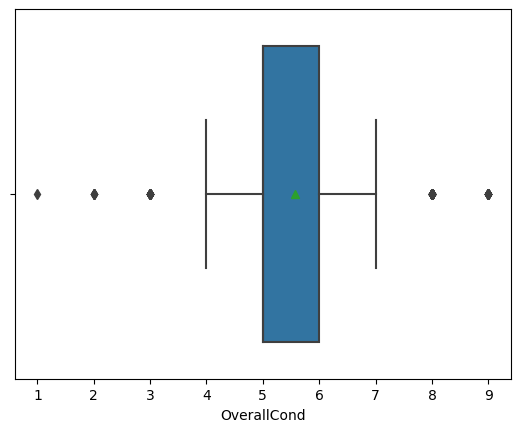

YearBuilt


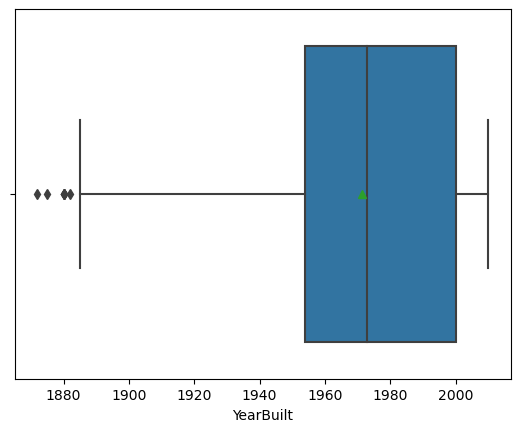

YearRemodAdd


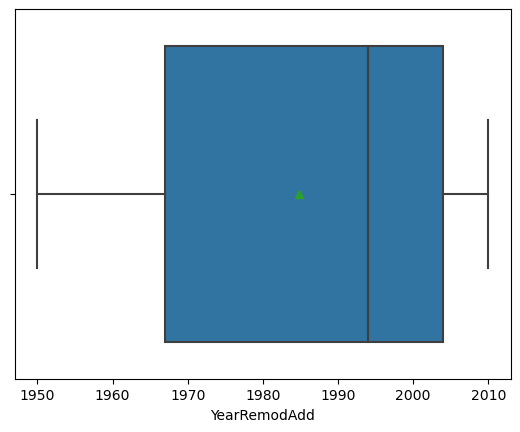

MasVnrArea


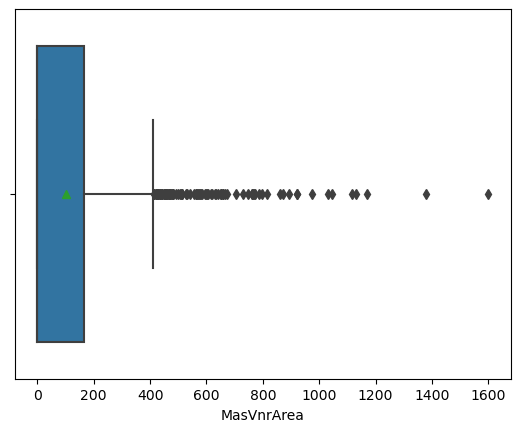

BsmtFinSF1


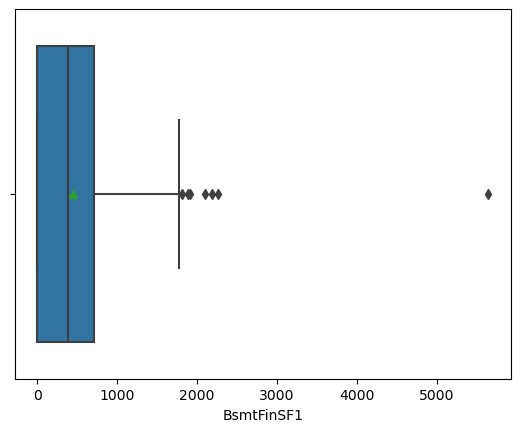

BsmtFinSF2


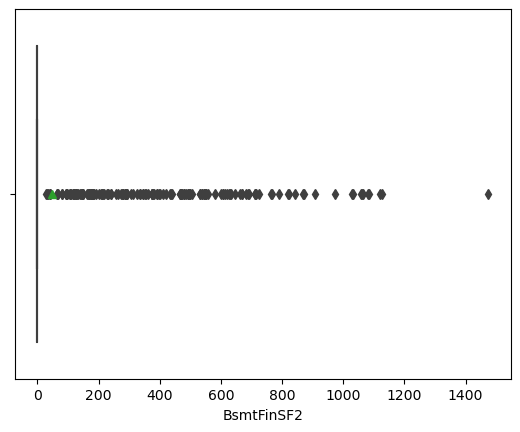

BsmtUnfSF


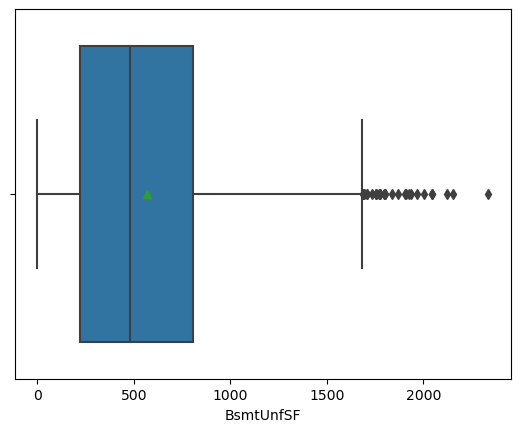

TotalBsmtSF


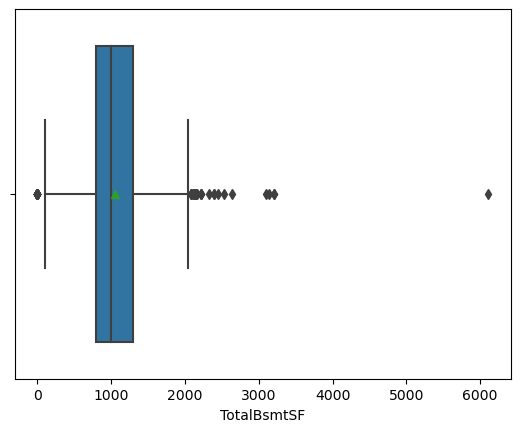

1stFlrSF


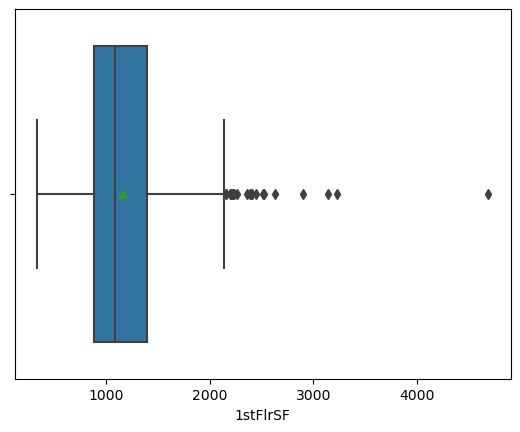

2ndFlrSF


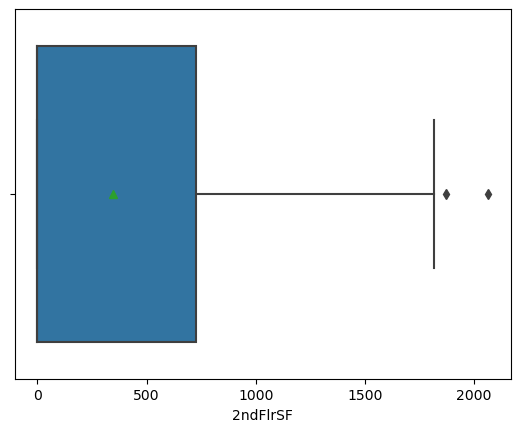

LowQualFinSF


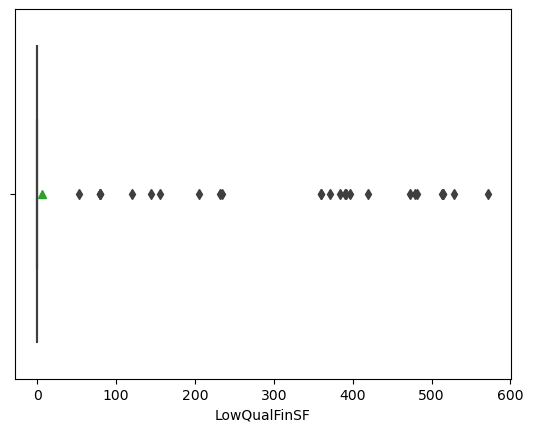

GrLivArea


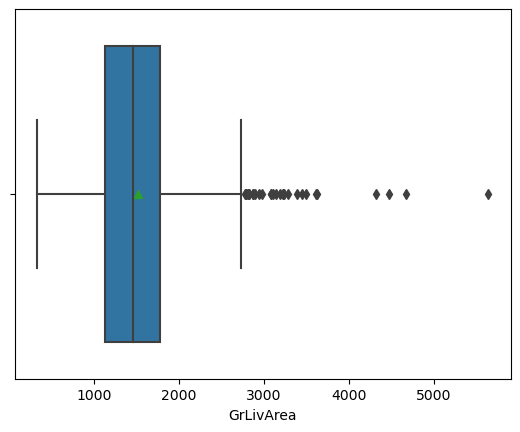

BsmtFullBath


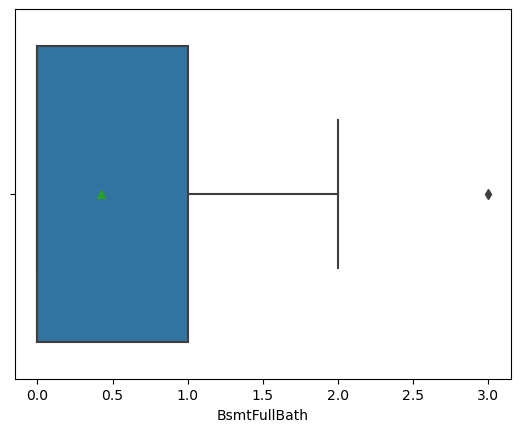

BsmtHalfBath


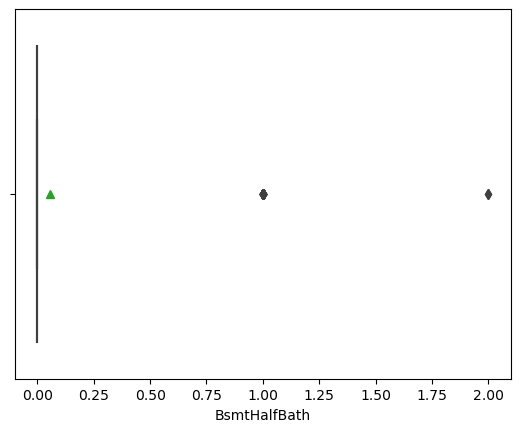

FullBath


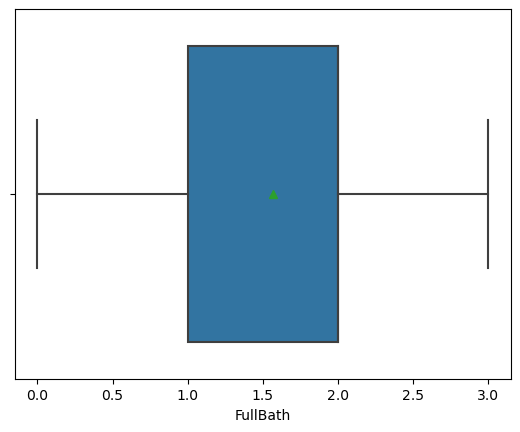

HalfBath


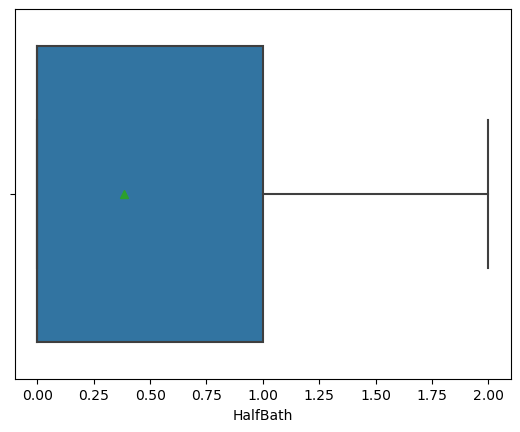

BedroomAbvGr


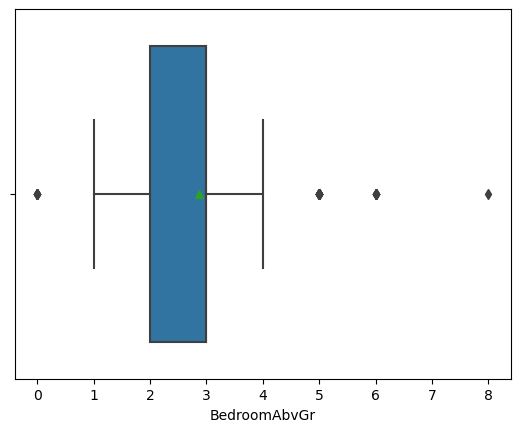

KitchenAbvGr


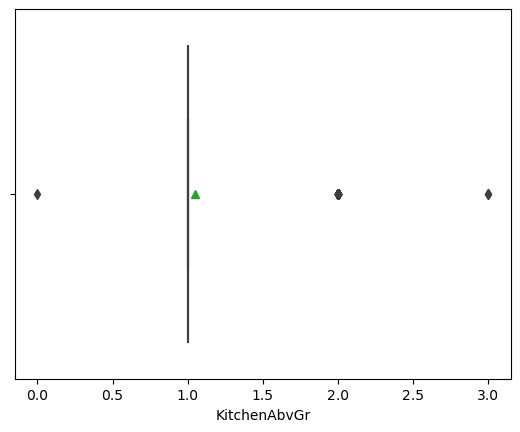

TotRmsAbvGrd


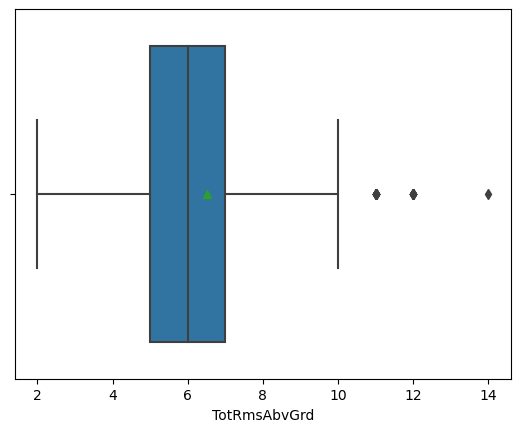

Fireplaces


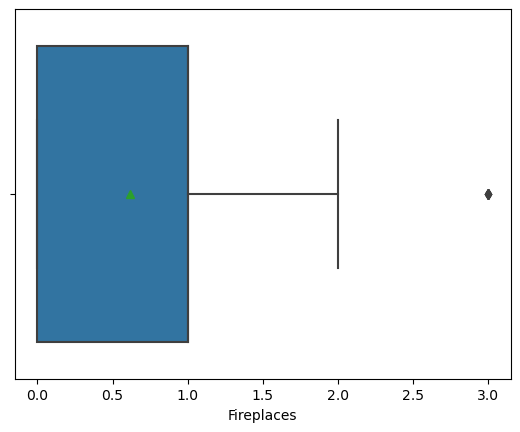

GarageYrBlt


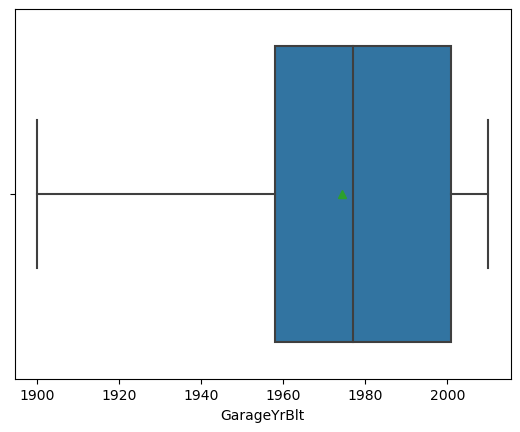

GarageCars


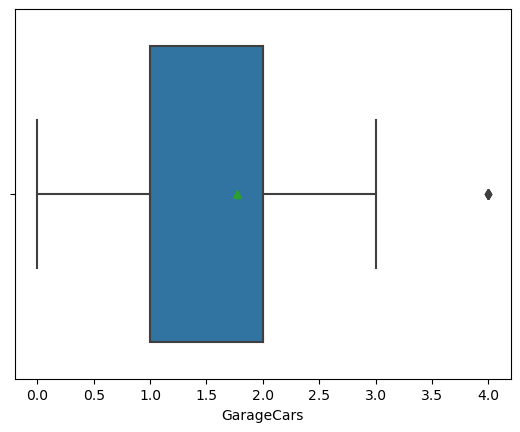

GarageArea


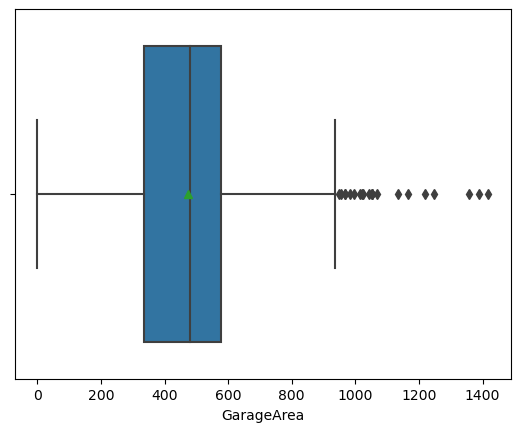

WoodDeckSF


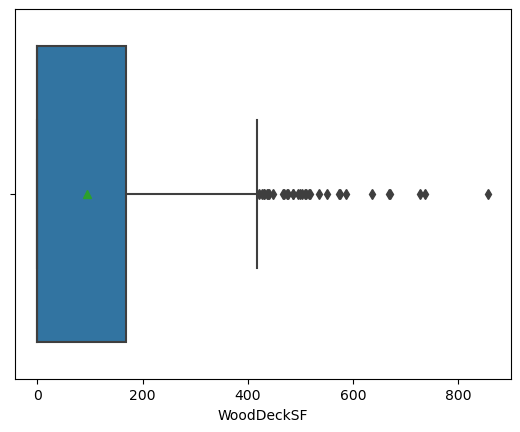

OpenPorchSF


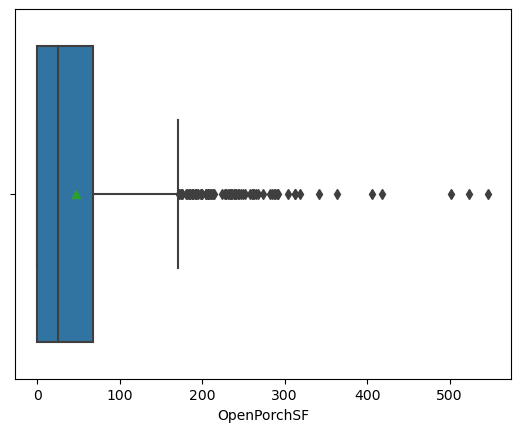

EnclosedPorch


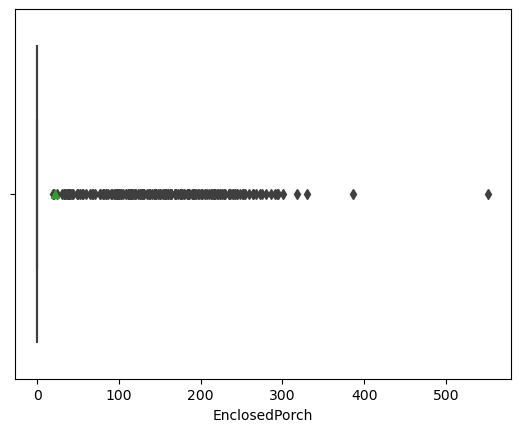

3SsnPorch


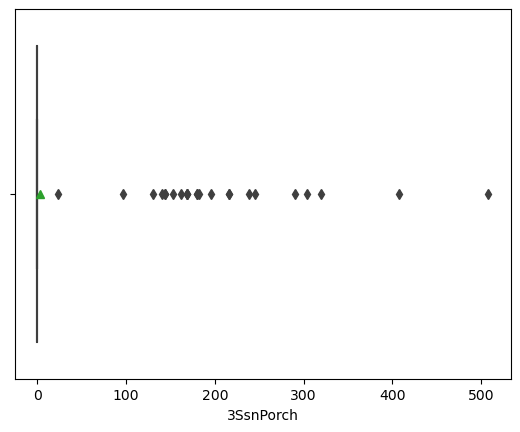

ScreenPorch


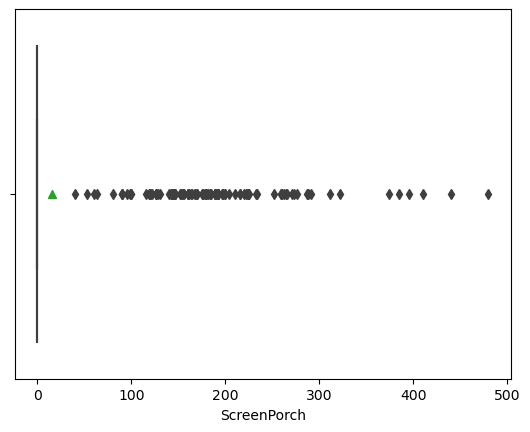

PoolArea


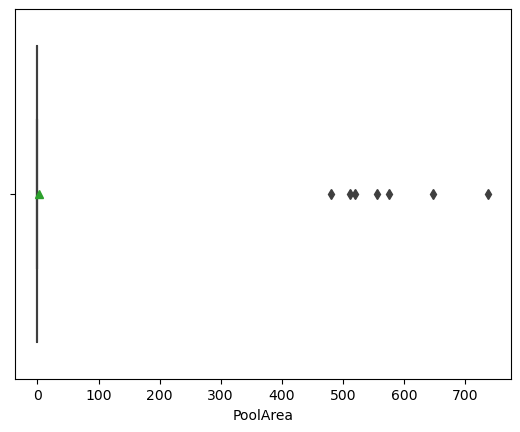

MiscVal


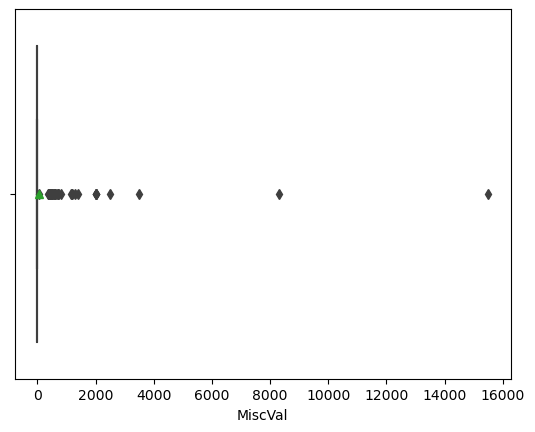

MoSold


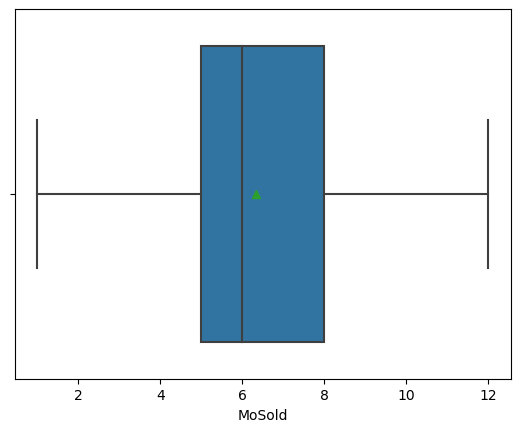

YrSold


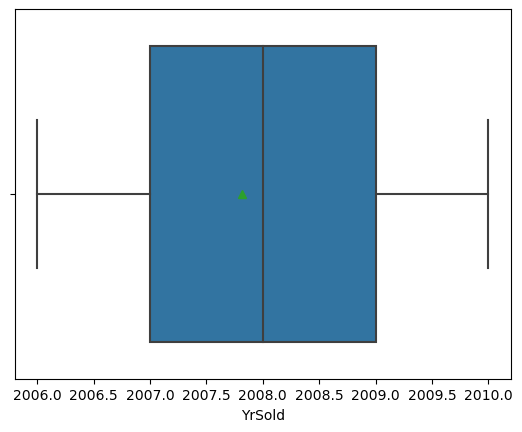

SalePrice


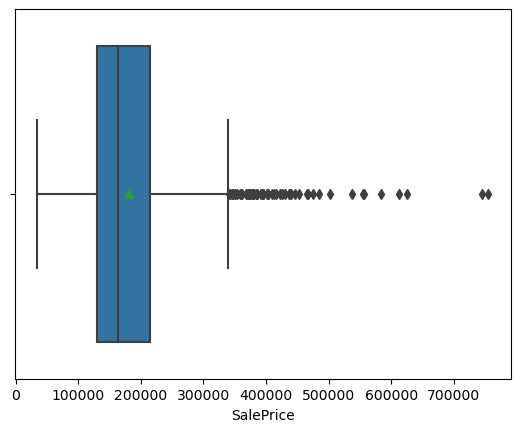

In [384]:
for i in df_train.select_dtypes(include="number").columns:
    print(i)
    sns.boxplot(df_train,x=df_train[i],showmeans=True)
    plt.show()

In [385]:
def winser(col):
    q1,q3=np.percentile(col,[25,75])
    qtr=q3-q1
    lw=q1-1.5*qtr
    up=q3+1.5*qtr
    return (lw,up)

# WHISKER

In [386]:
l2=winser(df_train["LotFrontage"])
print(l2)

(31.5, 107.5)


In [387]:
df_train["LotFrontage"].where(df_train["LotFrontage"]<250,other=107.5,inplace=True)
df_test["LotFrontage"].where(df_test["LotFrontage"]<250,other=107.5,inplace=True)

In [388]:
l2=winser(df_train["LotArea"])
print(l2)

(1481.5, 17673.5)


In [389]:
df_train["LotArea"].where(df_train["LotArea"]<50000,other=17673.5,inplace=True)
df_test["LotArea"].where(df_test["LotArea"]<50000,other=17673.5,inplace=True)

In [390]:

l2=winser(df_train["MasVnrArea"])
print(l2)

(-246.375, 410.625)


In [391]:
df_train["MasVnrArea"].where(df_train["MasVnrArea"]<1200,other=410.625,inplace=True)
df_test["MasVnrArea"].where(df_test["MasVnrArea"]<1200,other=410.625,inplace=True)

In [392]:
for i in ["MSSubClass","OverallQual","BsmtFinSF1","2ndFlrSF","BsmtFullBath","TotRmsAbvGrd","Fireplaces","GarageCars"]:
    l=winser(df_train[i])
    lw,up=l[0],l[1]
    df_train[i]=np.where(df_train[i]<lw,lw,df_train[i])
    df_train[i]=np.where(df_train[i]>up,up,df_train[i])
    df_test[i]=np.where(df_test[i]<lw,lw,df_test[i])
    df_test[i]=np.where(df_test[i]>up,up,df_test[i])

## Categorical Encoding

In [393]:
train_categorical=[feature for feature in df_train.columns if df_train[feature].dtypes=="object"]
test_categorical=[feature for feature in df_test.columns if df_test[feature].dtypes=="object"]
train_numerical=[feature for feature in df_train.columns if df_train[feature].dtypes!="object"]
test_numerical=[feature for feature in df_test.columns if df_test[feature].dtypes!="object"]

In [394]:
train_categorical

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [395]:
for i in train_categorical:
    print(df_train[i].value_counts())
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
Pave    1454
Grvl       6
Name: Street, dtype: int64
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
N

In [396]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_train["SaleCondition"]=le.fit_transform(df_train["SaleCondition"])
df_test["SaleCondition"]=le.transform(df_test["SaleCondition"])
df_train["SaleCondition"].value_counts()

4    1198
5     125
0     101
3      20
2      12
1       4
Name: SaleCondition, dtype: int64

In [397]:
label=["Street","Utilities",'LandSlope',"RoofStyle","ExterCond","Foundation","BsmtQual","BsmtExposure","Heating","HeatingQC","CentralAir","KitchenQual","GarageFinish","PavedDrive"]
onehot=['MSZoning','LotShape','LandContour','LotConfig',"BldgType","MasVnrType","ExterQual"]
frequency=["Condition2","RoofMatl","Exterior1st","Exterior2nd","BsmtFinType1","BsmtFinType2","Electrical","Functional","GarageType","GarageQual","GarageCond","SaleType"]
feature=["Neighborhood","Condition1","HouseStyle",'BsmtCond']

In [398]:
from sklearn.preprocessing import LabelEncoder
for i in label:
    labencod= LabelEncoder()
    df_train[i]=labencod.fit_transform(df_train[i])
    df_test[i]=labencod.transform(df_test[i])
    

In [399]:
from sklearn.preprocessing import OneHotEncoder

In [400]:
from sklearn.preprocessing import OneHotEncoder
for i in onehot:
    onehott= OneHotEncoder(sparse=False,drop="first")
    train_encoded=onehott.fit_transform(df_train[i].values.reshape(-1,1))
    train_feature=onehott.get_feature_names([i])
    df=pd.DataFrame(train_encoded,columns=train_feature)
    df_train=pd.concat([df_train.drop(i,axis=1),df],axis=1)
    test_encoded=onehott.transform(df_test[i].values.reshape(-1,1))
    test_feature=onehott.get_feature_names([i])
    df_=pd.DataFrame(test_encoded,columns=test_feature)
    df_test=pd.concat([df_test.drop(i,axis=1),df_],axis=1)

In [401]:
# df_train=pd.get_dummies(df_train,columns([df_train[i]]))

In [402]:
for i in frequency:
    df_train[i]=df_train[i].map(df_train[i].value_counts())
    df_test[i]=df_test[i].map(df_test[i].value_counts())

In [403]:
for i in feature:
    df_train[i]=df_train[i].map(df_train[i].value_counts())
    df_test[i]=df_test[i].map(df_test[i].value_counts())

In [404]:
[x for x in df_test.columns if df_test[x].dtypes=="object"]
    

[]

In [405]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 93 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1460 non-null   int64  
 1   MSSubClass          1460 non-null   float64
 2   LotFrontage         1460 non-null   float64
 3   LotArea             1460 non-null   float64
 4   Street              1460 non-null   int32  
 5   Utilities           1460 non-null   int32  
 6   LandSlope           1460 non-null   int32  
 7   Neighborhood        1460 non-null   int64  
 8   Condition1          1460 non-null   int64  
 9   Condition2          1460 non-null   int64  
 10  HouseStyle          1460 non-null   int64  
 11  OverallQual         1460 non-null   float64
 12  OverallCond         1460 non-null   int64  
 13  YearBuilt           1460 non-null   int64  
 14  YearRemodAdd        1460 non-null   int64  
 15  RoofStyle           1460 non-null   int32  
 16  RoofMa

## Scaling

In [406]:
datetime=["YearBuilt","YearRemodAdd","GarageYrBlt"]
for i in datetime:
    print(df_train[i].value_counts())

2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1906     1
1911     1
1913     1
1917     1
1872     1
Name: YearBuilt, Length: 112, dtype: int64
1950    178
2006     97
2007     76
2005     73
2004     62
       ... 
2010      6
1983      5
1952      5
1986      5
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64
1901.0    81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
          ..
1933.0     1
1927.0     1
1908.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 98, dtype: int64


In [407]:
for i in datetime:
    df_train[i]=df_train[i]-df_train[i].min()

In [408]:
train_numerical=list(set(train_numerical)-set(datetime)-set(["SalePrice"])-set(["Id"]))

In [409]:
test_numerical=list(set(test_numerical)-set(datetime)-set(["Id"]))

YrSold


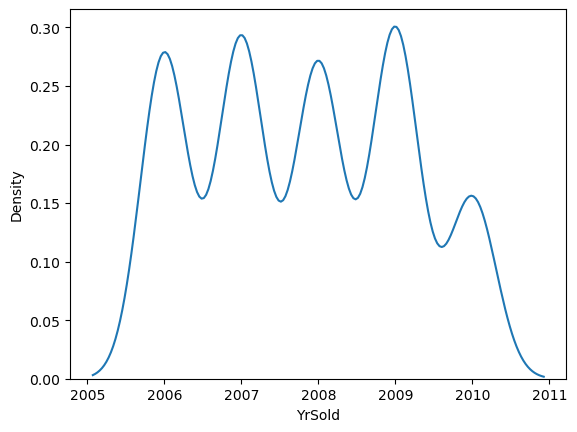

LotArea


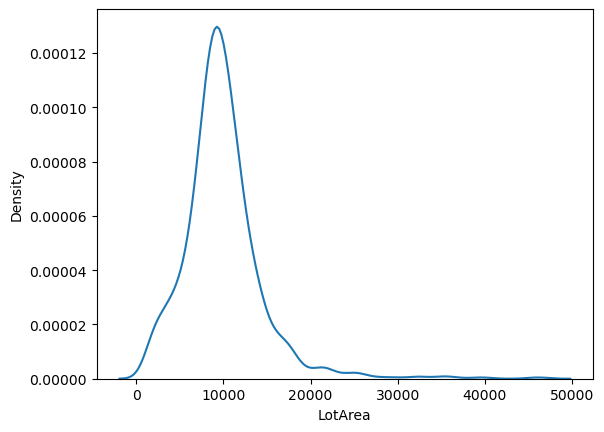

1stFlrSF


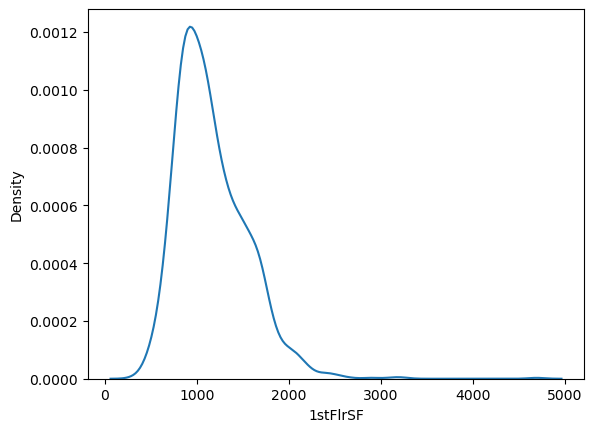

TotRmsAbvGrd


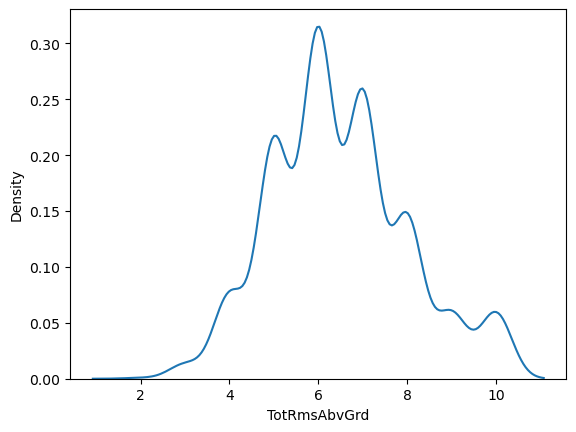

GarageCars


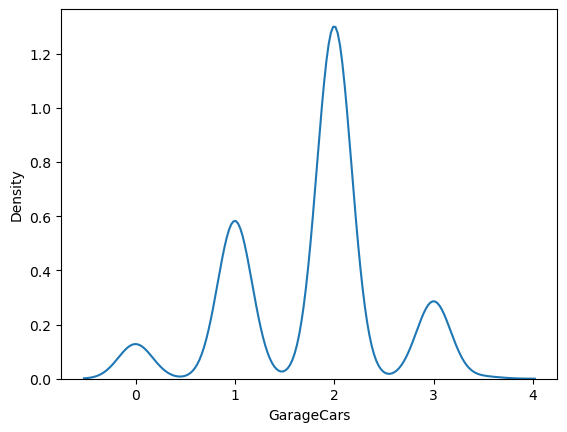

MasVnrArea


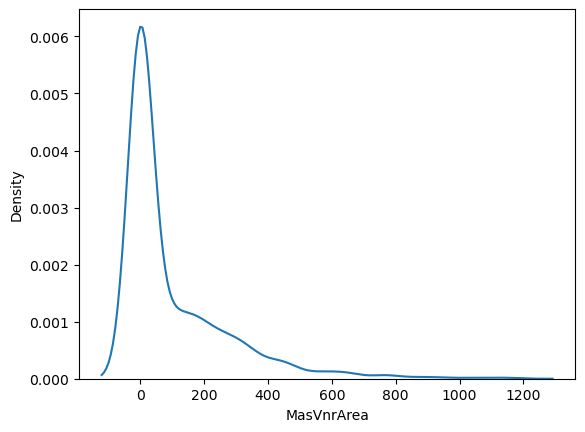

BsmtFinSF2


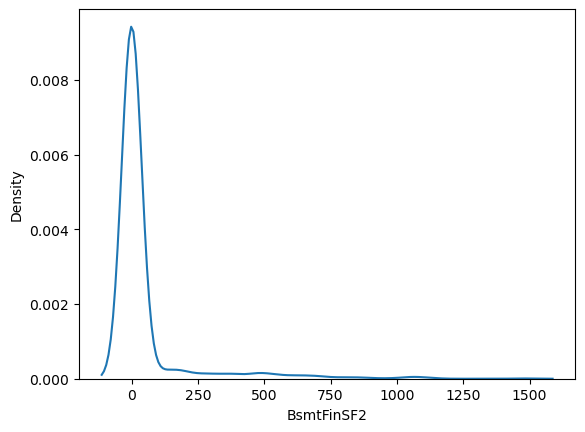

MiscVal


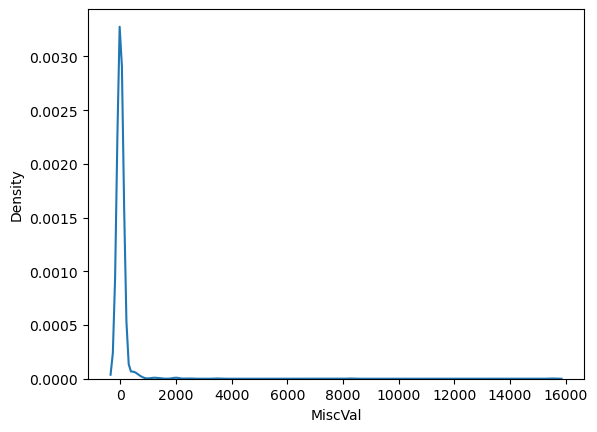

GarageArea


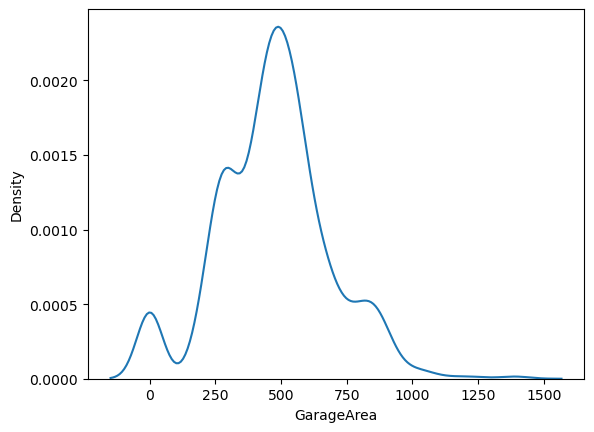

OverallCond


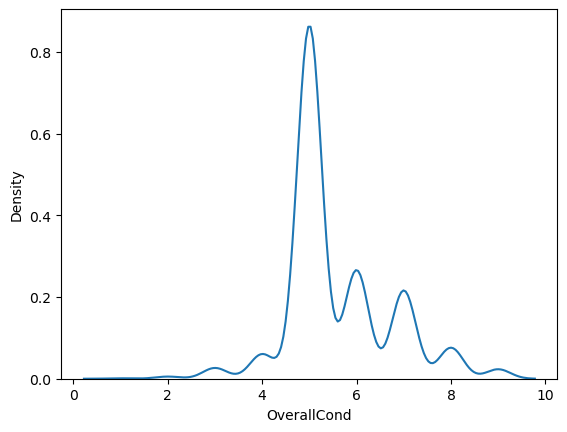

EnclosedPorch


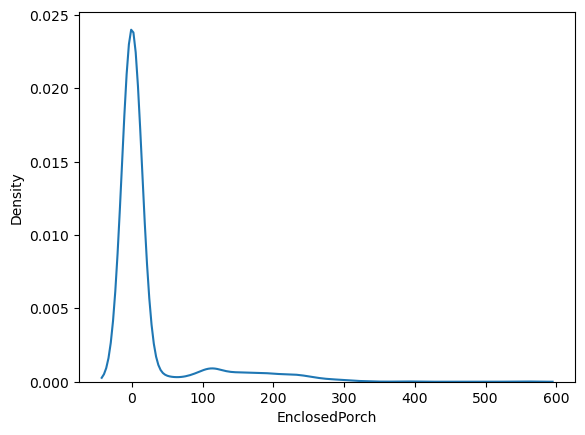

BsmtUnfSF


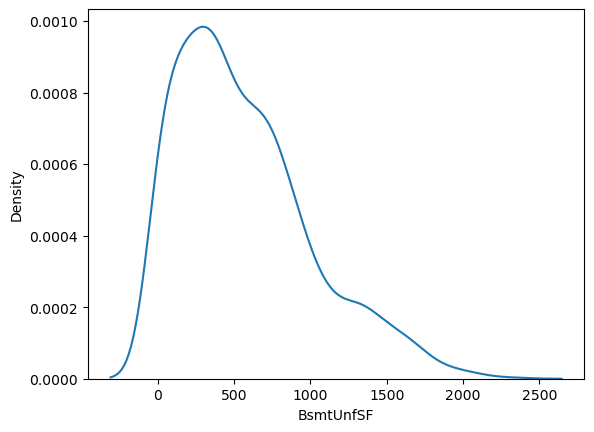

2ndFlrSF


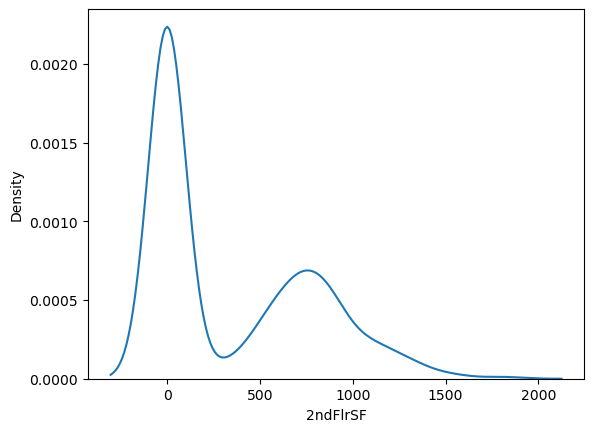

GrLivArea


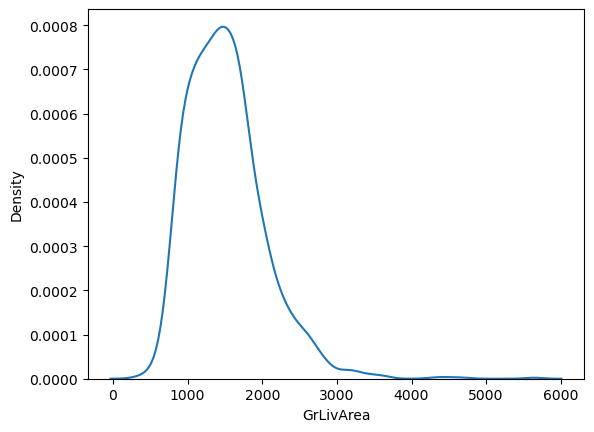

OverallQual


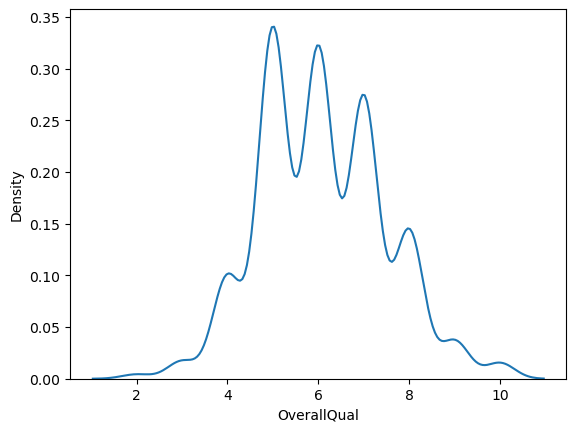

Fireplaces


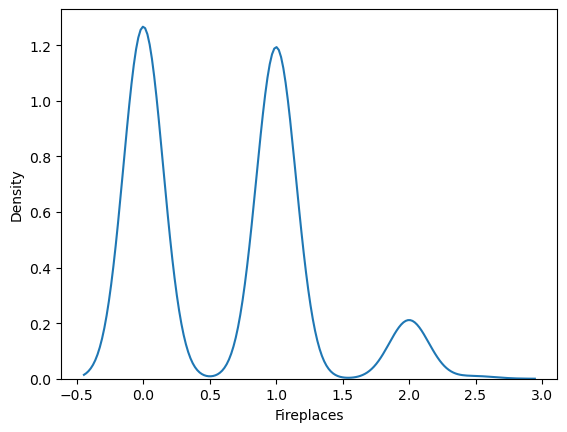

BsmtFinSF1


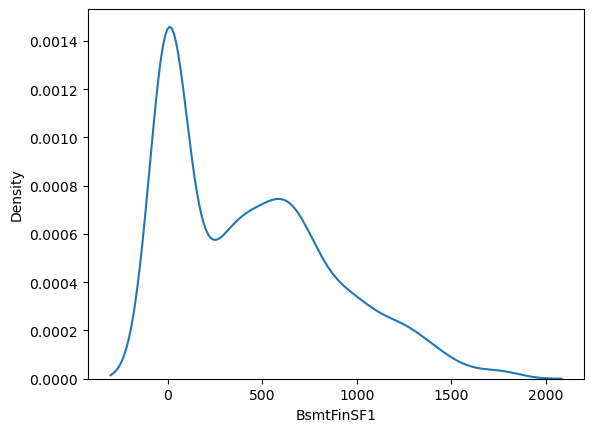

LowQualFinSF


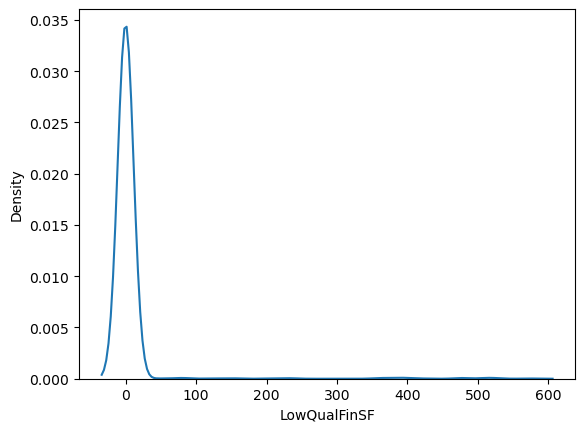

LotFrontage


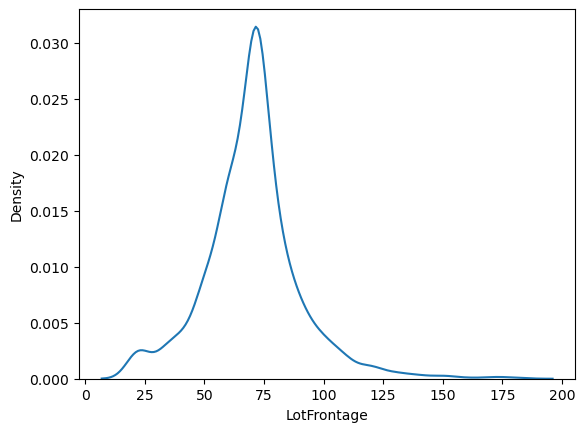

TotalBsmtSF


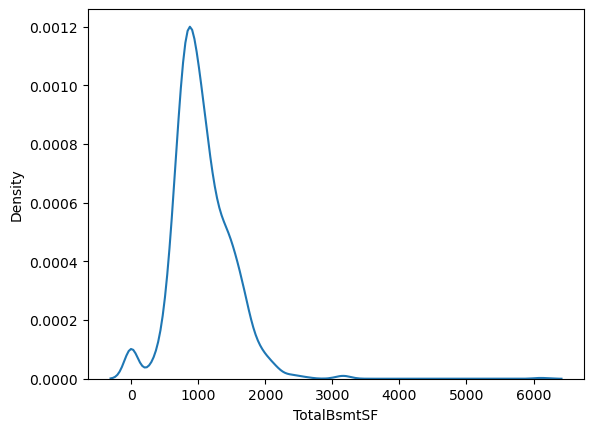

HalfBath


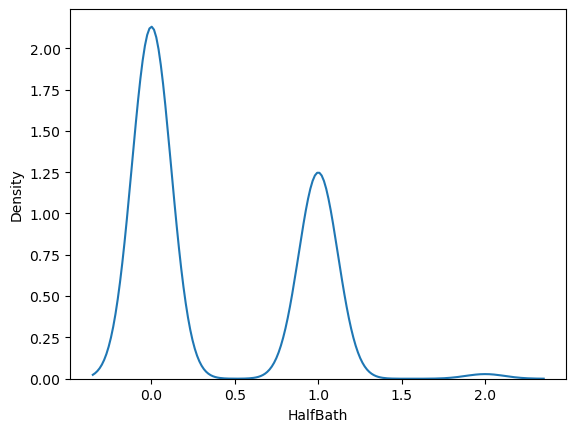

MSSubClass


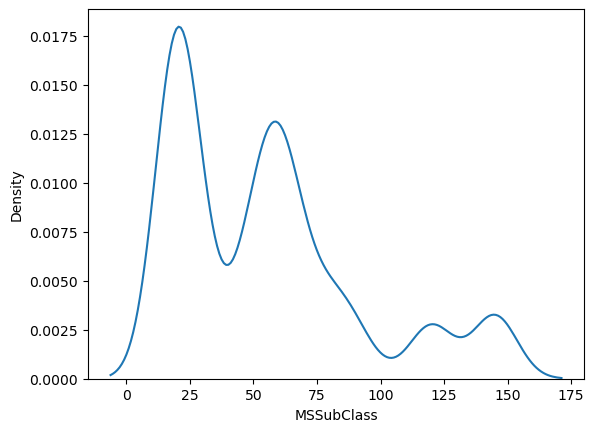

BedroomAbvGr


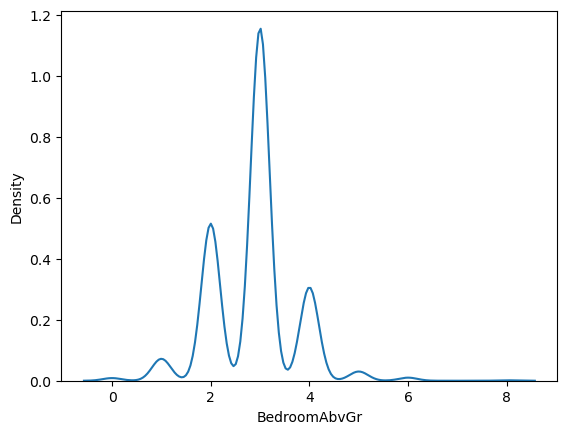

3SsnPorch


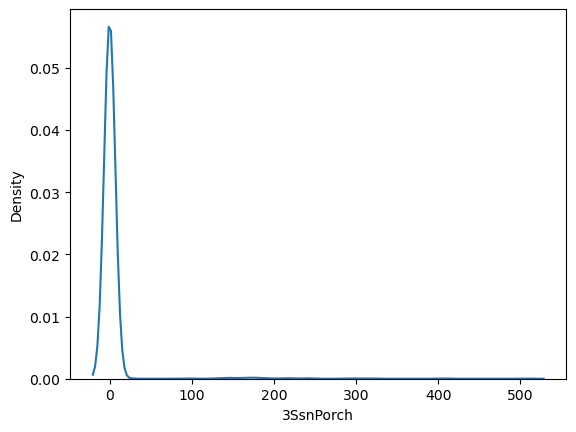

WoodDeckSF


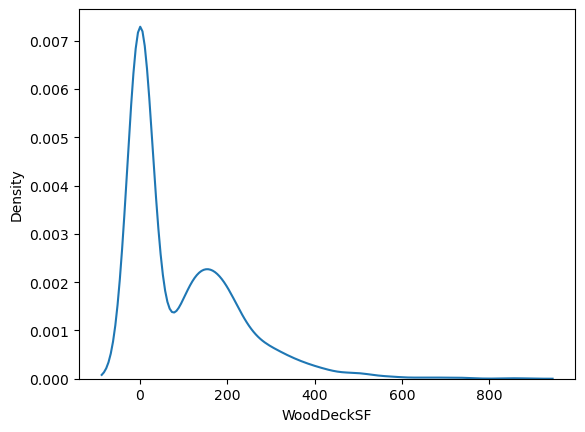

OpenPorchSF


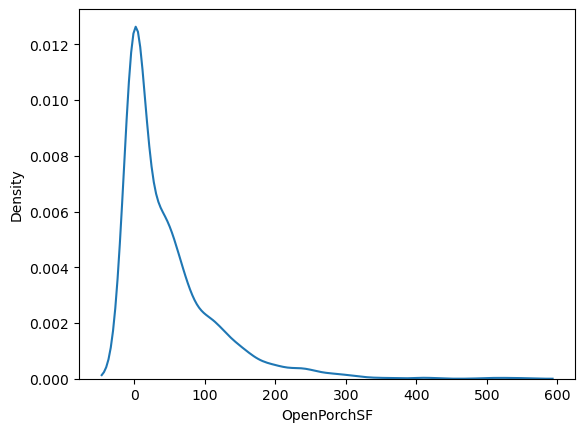

BsmtHalfBath


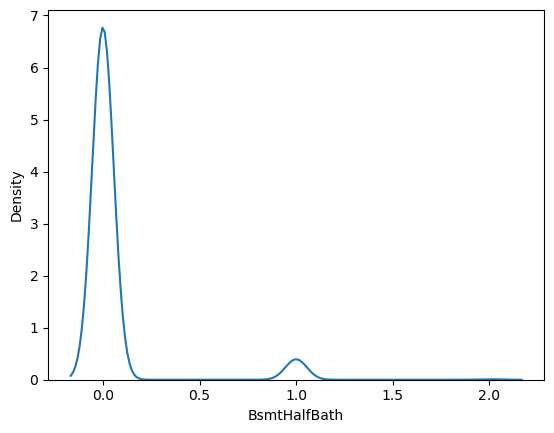

BsmtFullBath


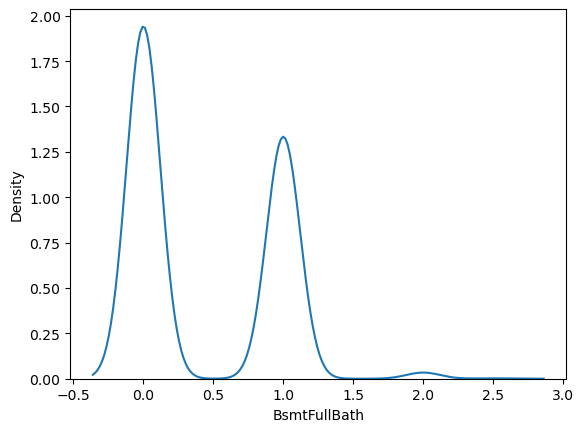

FullBath


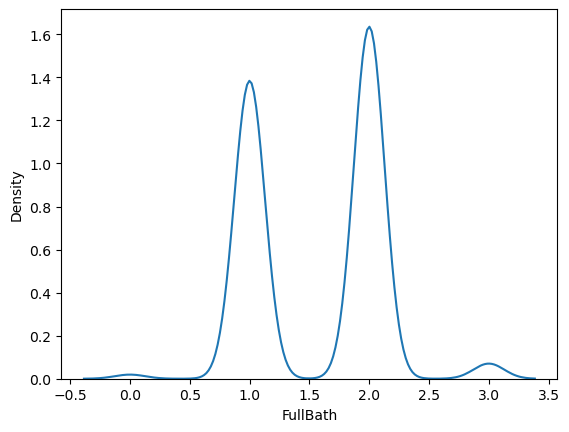

PoolArea


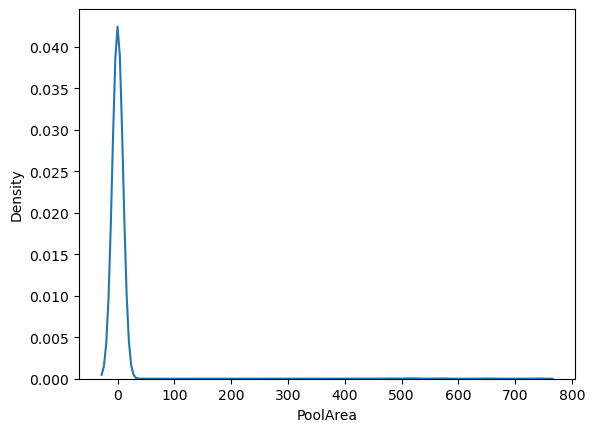

ScreenPorch


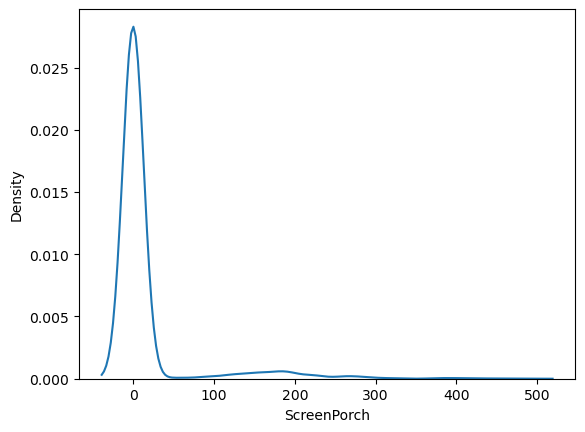

KitchenAbvGr


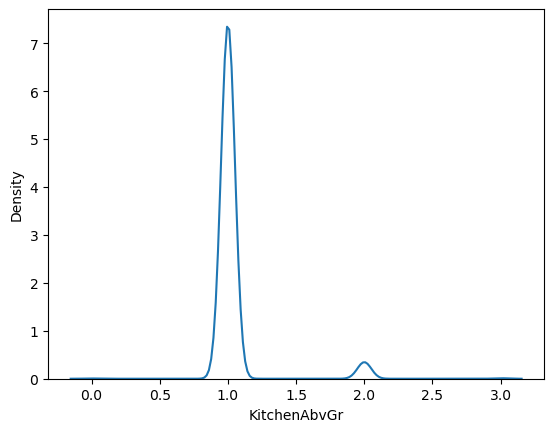

MoSold


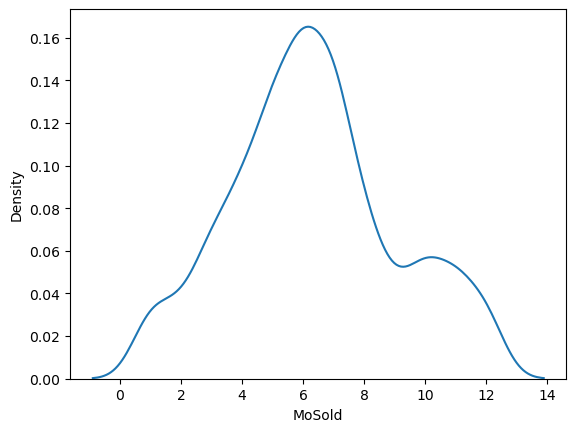

In [410]:
for i in train_numerical:
    print(i)
    sns.kdeplot(x=df_train[i])
    plt.show()

In [411]:
Normal=["MoSold","TotalBsmtSF","GrLivArea","TotRmsAbvGrd","LotArea","BsmtUnfSF","LotFrontage","GarageArea"]

In [412]:
Minmax=list(set(train_numerical)-set(Normal))

In [413]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df_train[Normal]=ss.fit_transform(df_train[Normal])
df_test[Normal]=ss.transform(df_test[Normal])

In [414]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
df_train[Minmax]=mm.fit_transform(df_train[Minmax])
df_test[Minmax]=mm.transform(df_test[Minmax])

In [415]:
df_test.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Utilities,LandSlope,Neighborhood,Condition1,Condition2,...,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA
0,1461,0.00,0.492174,0.367815,1,0,0,218,83,1444,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1462,0.00,0.541783,0.941675,1,0,0,218,1251,1444,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1463,0.32,0.194521,0.846864,1,0,0,86,1251,1444,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1464,0.32,0.392956,0.011132,1,0,0,86,1251,1444,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1465,0.80,-1.343352,-1.067812,1,0,0,26,1251,1444,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [416]:
df_test_id=df_test["Id"]
df_train=df_train.drop(["Id"],axis=1).astype("float64")
df_test=df_test.drop(["Id"],axis=1).astype("float64")

# Desription till Now

#### 1) start by basic sanity of data check (shape,head(),info(),describe(),unique(),nunique(),value_counts().index,value_counts().values,isnull.sum(),isnull().all(),isnull().any())
#### 2) Basic EDA through Graph to understand the data. (Distribution-histplot,kdeplot,barplot):: (Relationship--scatterplot,swarmplot,regplot,lmplot):: (Outlier:Boxplot)
#### 3) Missing Value Imputation
   I) .isnull().all() to know same row is empty in many column. So if needs to be imputed can be fill with x unknown values
   II) sklearn.SimpleImputer, fillna() ,outlier need to see for any trend,knnimputer
#### 4) Outlier handling.:: Whisker fn to remove outline and bring back to q3 or q1. using (np.where(condition,true,false))
#### 5) Categorical encoding: labelencoder,ordinalencoder, pd.get_dummies (one hot encoder), frequency using map.(x.value_counts())
#### Scaling: MinMaxscalaer (abs value, outlier diminished)::standardscaler (Normal dist, relative diff):: in case of datetime (refernce date, cyclic cos/sin using np.cos())

# Feature Selection

## Filter Methods
### VarienceThreshold to remove low varianc columns
### Coorelation Matrix with traget variable
### Information gain for features in terms of Target Variable
### Chi-squared test to assess the independence of categorical feature with Target

## Wrapper Method
### Recursive Feature Elimination
### Forward selection

## Embedded Method
### Lasso Regularization (L1)
### Tree based Methods (Random Forest)

In [417]:
x=df_train.drop(["SalePrice"],axis=1)
y=df_train["SalePrice"]

In [418]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [419]:
x_train.columns, x_train.shape

(Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Utilities',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle',
        'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
        'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterCond',
        'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
        'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
        'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
        '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
        'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
        'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
        'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSo

## 1st Method (Variance Threshold)

In [420]:
from sklearn.feature_selection import VarianceThreshold


In [421]:
vart=VarianceThreshold(threshold=0.01)
fgh=vart.fit_transform(x_train)

In [422]:
a=vart.get_support()
x_train=pd.DataFrame(fgh,columns=x_train.columns[a])

In [423]:
x_test_=vart.transform(x_test)
a=vart.get_support()
x_test=pd.DataFrame(x_test_,columns=x_test.columns[a])

In [424]:
# df_test_id=df_test["Id"]
# df_test=df_test.drop("Id",axis=1)

In [425]:
x_df_test_=vart.transform(df_test)
a=vart.get_support()
df_test=pd.DataFrame(x_df_test_,columns=df_test.columns[a])

In [426]:
x_train.shape,x_test.shape,df_test.shape

((1095, 80), (365, 80), (1459, 80))

## 2nd Method (Correlation Matrix)

In [427]:
x_train_corr=x_train.corr()

In [428]:
x_train_corr.index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrArea', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotShape_IR2',

In [429]:
def correlation_columns(df_corr,thres):
    d={}
    for i in df_corr.columns:
        for j in df_corr.index:
            if df_corr.loc[j,i]>=thres and i!=j:
                if i not in d:
                    d[i]=[j]
                else:
                    d[i].append(j)
                    
    return d
            
            

In [430]:
d=correlation_columns(x_train_corr,0.7)
print(d)

{'YearBuilt': ['GarageYrBlt'], 'Exterior1st': ['Exterior2nd'], 'Exterior2nd': ['Exterior1st'], 'GrLivArea': ['TotRmsAbvGrd'], 'TotRmsAbvGrd': ['GrLivArea'], 'GarageYrBlt': ['YearBuilt', 'GarageCars'], 'GarageCars': ['GarageYrBlt', 'GarageArea'], 'GarageArea': ['GarageCars'], 'GarageQual': ['GarageCond'], 'GarageCond': ['GarageQual']}


In [431]:
cor_col=[]
for i in d:
    col=[i]
    for j in d[i]:
        col.append(j)
    cor_col.append(col)
print(cor_col)

[['YearBuilt', 'GarageYrBlt'], ['Exterior1st', 'Exterior2nd'], ['Exterior2nd', 'Exterior1st'], ['GrLivArea', 'TotRmsAbvGrd'], ['TotRmsAbvGrd', 'GrLivArea'], ['GarageYrBlt', 'YearBuilt', 'GarageCars'], ['GarageCars', 'GarageYrBlt', 'GarageArea'], ['GarageArea', 'GarageCars'], ['GarageQual', 'GarageCond'], ['GarageCond', 'GarageQual']]


In [432]:
def corr_comp_target(cor_col,df_corr):
    drp=set()
    for i in cor_col:
        d={}
        for j in i:
            d[j]=df_corr.loc[j,"SalePrice"]
        d.pop(max(d))
        for i in d:
            drp.add(i)
    return drp
        
        
            
    
        

In [433]:
drp=list(corr_comp_target(cor_col,df_train.corr()))
print(drp)

['GarageYrBlt', 'GrLivArea', 'Exterior1st', 'GarageCars', 'GarageCond', 'GarageArea']


In [434]:
x_train.drop(drp,axis=1,inplace=True)

In [435]:
x_train.shape

(1095, 74)

In [436]:
x_test.drop(drp,axis=1,inplace=True)
df_test.drop(drp,axis=1,inplace=True)

In [437]:
x_train.shape,x_test.shape,df_test.shape

((1095, 74), (365, 74), (1459, 74))

## 3rd Method (Mutual Information)

In [438]:
from sklearn.feature_selection import mutual_info_regression
mureg=mutual_info_regression(x_train,y_train)
mureg

array([0.26490347, 0.18608145, 0.17216637, 0.        , 0.33444525,
       0.03527686, 0.00666579, 0.10222235, 0.53866374, 0.09529262,
       0.33005994, 0.23969536, 0.02102433, 0.        , 0.18282146,
       0.07912945, 0.03757389, 0.18879052, 0.32371446, 0.03226864,
       0.06706544, 0.15184205, 0.15199249, 0.        , 0.        ,
       0.14499199, 0.33450007, 0.00763148, 0.15920244, 0.07304978,
       0.04473871, 0.22147857, 0.02332522, 0.        , 0.24320791,
       0.07155966, 0.06166637, 0.29973046, 0.17668455, 0.00876224,
       0.1679226 , 0.16458986, 0.27173027, 0.07118069, 0.04198401,
       0.09503012, 0.1629257 , 0.01872282, 0.01128178, 0.        ,
       0.00657348, 0.08190168, 0.06337189, 0.02987526, 0.01034372,
       0.06510254, 0.07639255, 0.        , 0.07397404, 0.01675351,
       0.0007288 , 0.00855507, 0.02595461, 0.        , 0.02707382,
       0.01114279, 0.02437876, 0.01756746, 0.01889808, 0.04897875,
       0.0821168 , 0.0538014 , 0.20380722, 0.23818836])

In [439]:
mureg=pd.Series(mureg)
mureg.index=x_train.columns
mureg.sort_values(ascending=False)

OverallQual      0.538664
TotalBsmtSF      0.334500
Neighborhood     0.334445
YearBuilt        0.330060
BsmtQual         0.323714
                   ...   
LotConfig_FR2    0.000000
RoofMatl         0.000000
MoSold           0.000000
BsmtFinSF2       0.000000
BsmtHalfBath     0.000000
Length: 74, dtype: float64

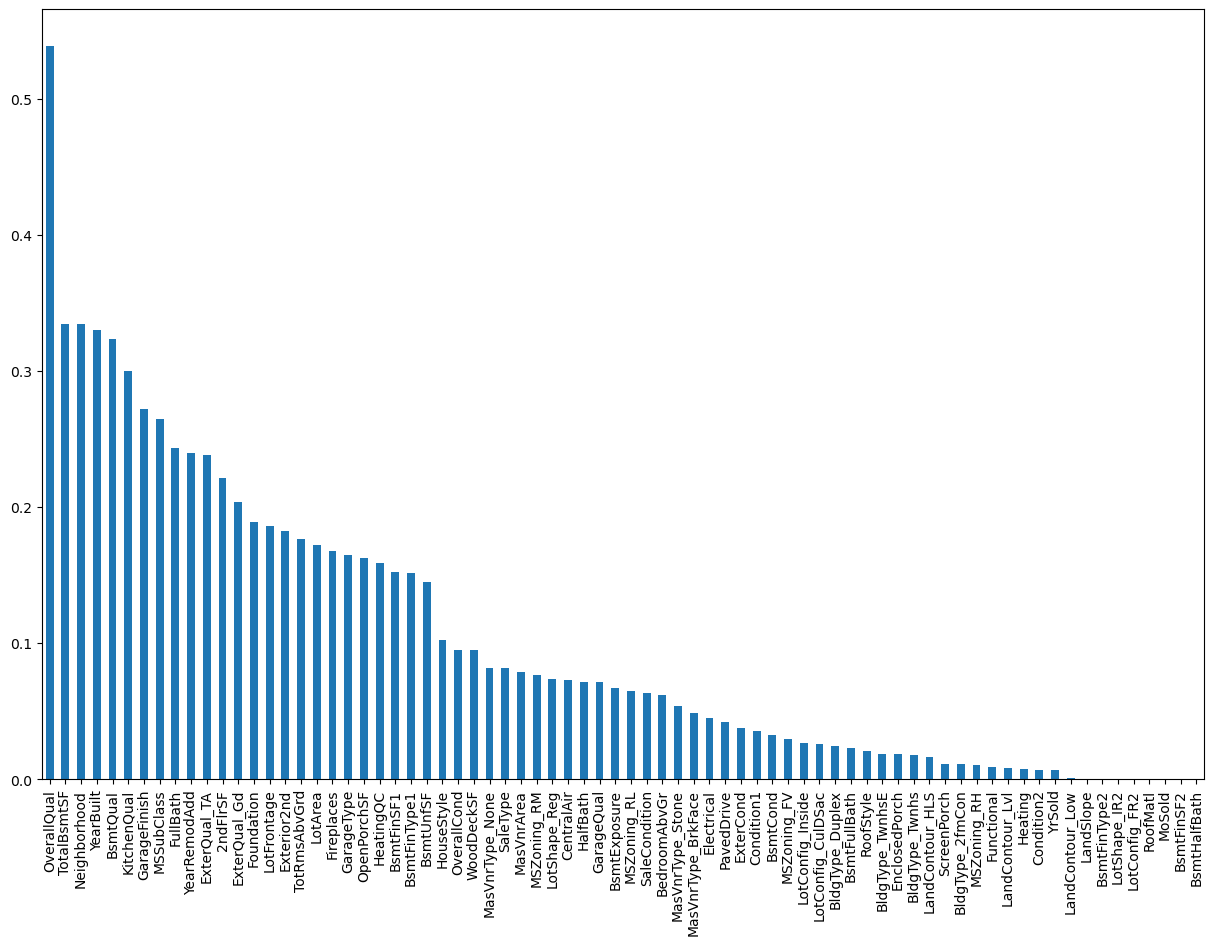

In [440]:
mureg.sort_values(ascending=False).plot.bar(figsize=(15,10))
plt.show()

In [441]:
from sklearn.feature_selection import SelectKBest


In [442]:
skb=SelectKBest(mutual_info_regression,k=20)
skb.fit_transform(x_train,y_train)

array([[ 0.8       , -1.34335221, -1.46333037, ...,  0.03656307,
         1.        ,  0.        ],
       [ 0.        ,  0.39295614,  0.04627995, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.24      , -0.50000244, -0.18803726, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.        , -0.50000244, -0.38069807, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.24      , -0.74804649, -0.49568708, ...,  0.43875686,
         1.        ,  0.        ],
       [ 0.8       , -0.84726411, -1.35441626, ...,  0.03656307,
         1.        ,  0.        ]])

In [443]:
col=x_train.columns[skb.get_support()]
col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'Exterior2nd', 'Foundation', 'BsmtQual',
       'TotalBsmtSF', '2ndFlrSF', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageFinish', 'OpenPorchSF', 'ExterQual_Gd',
       'ExterQual_TA'],
      dtype='object')

In [444]:
x_train_kbest=x_train[col]
x_test_kbest=x_test[col]
df_test_kbest=df_test[col]

## Model Training

## Linear Regression

In [110]:
from sklearn.linear_model import LinearRegression

In [111]:
x_train_kbest.shape

(1095, 20)

In [112]:
linearreg=LinearRegression()
linearreg.fit(x_train,y_train)

LinearRegression()

In [113]:
y_pred_lin=linearreg.predict(x_test)

In [114]:
from sklearn.metrics import mean_squared_error,r2_score

In [115]:
mse=mean_squared_error(y_test,y_pred_lin)
r2=r2_score(y_test,y_pred_lin)

In [116]:
print(mse,r2)

1060429176.8597083 0.8486249259045048


In [117]:
x_test.shape

(365, 74)

In [118]:
adjusted_r2=1-(1-r2)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1])
adjusted_r2

0.8106511100661159

<ipython-input-119-4531b49d3edd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred_lin,kde=True)


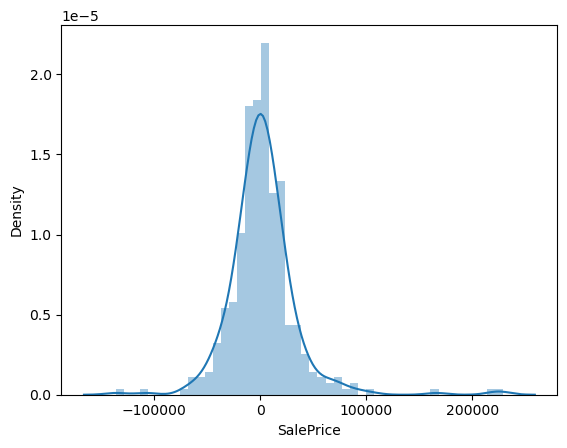

In [119]:
sns.distplot(y_test-y_pred_lin,kde=True)
plt.show()

## Ridge Regression

In [120]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [121]:
ridge_reg=Ridge()

In [122]:
parameter={"alpha":[1,5,10,15,30,60,70,100,1000]}

In [123]:
grid=GridSearchCV(ridge_reg,parameter,scoring="r2")

In [124]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 5, 10, 15, 30, 60, 70, 100, 1000]},
             scoring='r2')

In [125]:
grid.best_params_

{'alpha': 5}

In [126]:
grid.best_score_

0.7438927069594076

In [127]:
y_pred_ridge=grid.predict(x_test)

In [128]:
mse=mean_squared_error(y_test,y_pred_ridge)
r2=r2_score(y_test,y_pred_ridge)
print(mse,r2)

1164648633.9050736 0.8337477154535878


## Lasso Regression

In [129]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [130]:
lasso_regression=Lasso()

In [131]:
parameter={"alpha":[1,5,10,15,30,60,70,100,1000]}

In [132]:
lasso_grid=GridSearchCV(lasso_regression,parameter,scoring="r2")

In [133]:
lasso_grid.fit(x_train,y_train)

C:\Users\visha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 299184790371.8109, tolerance: 558649426.0559995
  model = cd_fast.enet_coordinate_descent(
C:\Users\visha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 305673137067.96814, tolerance: 558649426.0559995
  model = cd_fast.enet_coordinate_descent(
C:\Users\visha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 310766514939.96124, tolerance: 558649426.0559995
  model = cd_fast.enet_coordinate_descent(
C:\Users\visha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarn

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1, 5, 10, 15, 30, 60, 70, 100, 1000]},
             scoring='r2')

In [134]:
lasso_grid.best_params_

{'alpha': 100}

In [135]:
lasso_grid.best_score_

0.7399410888043485

In [136]:
y_pred_lasso=lasso_grid.predict(x_test)

In [137]:
mse=mean_squared_error(y_test,y_pred_lasso)
r2=r2_score(y_test,y_pred_lasso)
print(mse,r2)

1127122376.8794272 0.8391045465006228


## KNN Classifier

In [138]:
from sklearn.neighbors import KNeighborsRegressor

In [139]:
knnreg=KNeighborsRegressor()

In [140]:
parameter={"n_neighbors":[2,3,5,7,9,12],"weights":["uniform","distance"]}

In [141]:
knn_grid=GridSearchCV(knnreg,parameter)

In [142]:
knn_grid.fit(x_train_kbest,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 5, 7, 9, 12],
                         'weights': ['uniform', 'distance']})

In [143]:
knn_grid.best_params_

{'n_neighbors': 7, 'weights': 'distance'}

In [144]:
knn_grid.best_score_

0.5298064751364296

In [145]:
y_pred_knn=knn_grid.predict(x_test_kbest)

In [146]:
mse=mean_squared_error(y_test,y_pred_knn)
r2=r2_score(y_test,y_pred_knn)
print(mse,r2)

2858933016.0057993 0.5918905226528014


## SVR

In [147]:
from sklearn.svm import SVR

In [148]:
svrfn=SVR()

In [149]:
parameter={"C":[100,1000,1000],"kernel" :['poly']}

In [150]:
svn_grid=GridSearchCV(svrfn,parameter,error_score="raise")

In [151]:
svn_grid.fit(x_train_kbest,y_train)

GridSearchCV(error_score='raise', estimator=SVR(),
             param_grid={'C': [100, 1000, 1000], 'kernel': ['poly']})

In [152]:
svn_grid.best_params_

{'C': 1000, 'kernel': 'poly'}

In [153]:
svn_grid.best_score_

0.11047272579662049

In [154]:
y_pred_svn=svn_grid.predict(x_test_kbest)

In [155]:
mse=mean_squared_error(y_test,y_pred_svn)
r2=r2_score(y_test,y_pred_svn)
print(mse,r2)

5928784516.693784 0.15367266848648842


In [156]:
best_svr=svn_grid.best_estimator_

In [157]:
support_vector=best_svr.support_vectors_

In [158]:
print(support_vector,support_vector.shape)

[[ 0.8        -1.34335221 -1.46333037 ...  0.          1.
   0.        ]
 [ 0.          0.39295614  0.04627995 ...  1.          0.
   1.        ]
 [ 0.24       -0.50000244 -0.18803726 ...  2.          0.
   1.        ]
 ...
 [ 0.         -0.50000244 -0.38069807 ...  2.          0.
   1.        ]
 [ 0.24       -0.74804649 -0.49568708 ...  2.          1.
   0.        ]
 [ 0.8        -0.84726411 -1.35441626 ...  0.          1.
   0.        ]] (1095, 20)


In [159]:
best_svr.n_support_

array([1095])

## Decision Tree

In [160]:
from sklearn.tree import DecisionTreeRegressor

In [161]:
dtree=DecisionTreeRegressor()

In [162]:
from sklearn.model_selection import KFold

In [163]:
kfold=KFold(n_splits=5, shuffle=True, random_state=1)
parameter={'max_depth': [9], 'min_samples_leaf': [5], 'min_samples_split': [6],"max_features":[0.4,0.6,0.8],"ccp_alpha":[1,10,100]}

In [164]:
dtree_grid=GridSearchCV(dtree,parameter,scoring="neg_mean_squared_error",cv=kfold)

In [165]:
dtree_grid.fit(x_train_kbest,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': [1, 10, 100], 'max_depth': [9],
                         'max_features': [0.4, 0.6, 0.8],
                         'min_samples_leaf': [5], 'min_samples_split': [6]},
             scoring='neg_mean_squared_error')

In [166]:
dtree_grid.best_params_

{'ccp_alpha': 10,
 'max_depth': 9,
 'max_features': 0.4,
 'min_samples_leaf': 5,
 'min_samples_split': 6}

In [167]:
best_est=dtree_grid.best_estimator_

In [168]:
y_pred=best_est.predict(x_test_kbest)

In [169]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mse,r2)

1597667287.9349587 0.7719347888868028


[Text(288.94299450549454, 351.11999999999995, 'X[5] <= 113.5\nmse = 6071445130.643\nsamples = 1095\nvalue = 181712.287'),
 Text(167.3489010989011, 314.15999999999997, 'X[15] <= 0.2\nmse = 2441726581.308\nsamples = 662\nvalue = 145765.089'),
 Text(67.19505494505495, 277.2, 'X[6] <= 5.5\nmse = 819252618.274\nsamples = 359\nvalue = 122439.964'),
 Text(29.2967032967033, 240.23999999999998, 'X[4] <= 0.312\nmse = 741049542.863\nsamples = 104\nvalue = 105589.298'),
 Text(17.714285714285715, 203.28, 'X[17] <= 2.5\nmse = 633717017.284\nsamples = 45\nvalue = 90762.222'),
 Text(10.901098901098901, 166.32, 'X[12] <= 0.217\nmse = 306609054.178\nsamples = 33\nvalue = 98506.061'),
 Text(5.450549450549451, 129.36, 'X[4] <= 0.188\nmse = 260021405.896\nsamples = 21\nvalue = 91295.238'),
 Text(2.7252747252747254, 92.40000000000003, 'mse = 171269600.0\nsamples = 5\nvalue = 73180.0'),
 Text(8.175824175824175, 92.40000000000003, 'X[2] <= -0.292\nmse = 153158710.938\nsamples = 16\nvalue = 96956.25'),
 Text(5

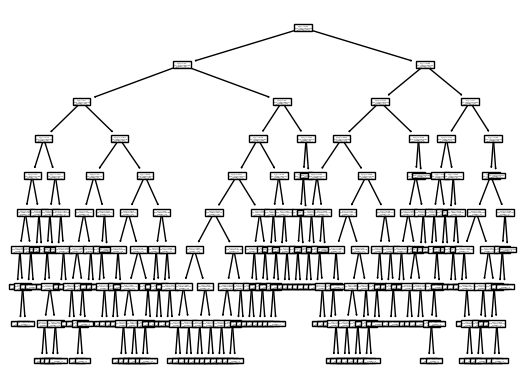

In [170]:
from sklearn import tree
tree.plot_tree(best_est)

## Random Forest

In [171]:
from sklearn.ensemble import RandomForestRegressor

In [172]:
rfr=RandomForestRegressor()

In [173]:
parameter=parameter={'max_depth': [2,4,6], 'min_samples_leaf': [3,5,7], 'min_samples_split': [2,4,6],"n_estimators": [10,50,100]}

In [174]:
rfr_grid=GridSearchCV(rfr,parameter)

In [175]:
rfr_grid.fit(x_train_kbest,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 6], 'min_samples_leaf': [3, 5, 7],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100]})

In [176]:
rfr_grid.best_params_

{'max_depth': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 50}

In [177]:
rfr_grid.best_score_

0.7807080835769103

In [178]:
best_rfr=rfr_grid.best_estimator_

In [179]:
y_pred_rgr=best_rfr.predict(x_test_kbest)

In [180]:
mse=mean_squared_error(y_test,y_pred_rgr)
r2=r2_score(y_test,y_pred_rgr)
print(mse,r2)

995606152.4312353 0.8578783398430128


## Adaboost

In [181]:
from sklearn.ensemble import AdaBoostRegressor

In [182]:
adareg=AdaBoostRegressor()

In [183]:
parameter={"n_estimators":[20,30,50],"learning_rate":[0.1,0.3,0.5]}

In [184]:
ada_grid=GridSearchCV(adareg,parameter)

In [185]:
ada_grid.fit(x_train_kbest,y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.1, 0.3, 0.5],
                         'n_estimators': [20, 30, 50]})

In [186]:
ada_grid.best_params_

{'learning_rate': 0.5, 'n_estimators': 50}

In [187]:
best_ada=ada_grid.best_estimator_

In [188]:
y_pred_ada=best_ada.predict(x_test_kbest)

In [189]:
mse=mean_squared_error(y_test,y_pred_ada)
r2=r2_score(y_test,y_pred_ada)
print(mse,r2)

1204758594.4277604 0.828022063633945


## Gradient Boosting

In [445]:
from sklearn.ensemble import GradientBoostingRegressor

In [446]:
gradboost=GradientBoostingRegressor()

In [447]:
parameter={"learning_rate":[0.1],
    "n_estimators":[65],
    "subsample":[0.7,0.6,0.5],
    "min_samples_split":[4],
    "min_samples_leaf":[4]}

In [448]:
grad_grid=GridSearchCV(gradboost,parameter)

In [449]:
grad_grid.fit(x_train_kbest,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1], 'min_samples_leaf': [4],
                         'min_samples_split': [4], 'n_estimators': [65],
                         'subsample': [0.7, 0.6, 0.5]})

In [450]:
grad_grid.best_params_

{'learning_rate': 0.1,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 65,
 'subsample': 0.6}

In [451]:
best_grad=grad_grid.best_estimator_

In [452]:
y_pred_grad=best_grad.predict(x_test_kbest)

In [453]:
mse=mean_squared_error(y_test,y_pred_grad)
r2=r2_score(y_test,y_pred_grad)
print(mse,r2)

790137901.3530697 0.8872087019359675


<AxesSubplot:xlabel='SalePrice'>

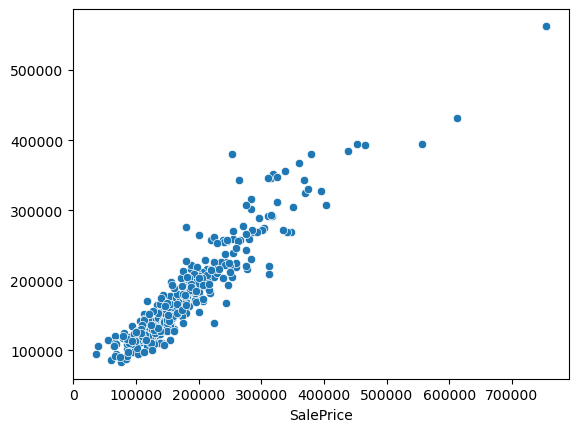

In [454]:
sns.scatterplot(x=y_test,y=y_pred_rgr)

In [200]:
from xgboost import XGBRegressor

In [201]:
xgb=XGBRegressor()

In [202]:
import warnings
warnings.filterwarnings("ignore")

In [203]:
parameter={'learning_rate': [0.1],
 'max_depth': [4],
 'max_leaf': [2],
 'n_estimators': [65],
 'reg_lambda': [10] ,
           "subsample":[0.7,0.9],
           "reg_alpha":[1,10,100]}

In [204]:
xgb_grid=GridSearchCV(xgb,parameter)

In [205]:
xgb_grid.fit(x_train_kbest,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                     

In [206]:
xgb_grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'max_leaf': 2,
 'n_estimators': 65,
 'reg_alpha': 10,
 'reg_lambda': 10,
 'subsample': 0.7}

In [207]:
best_xgb=xgb_grid.best_estimator_

In [208]:
y_pred_xgb=best_xgb.predict(x_test_kbest)

In [209]:
mse=mean_squared_error(y_test,y_pred_xgb)
r2=r2_score(y_test,y_pred_xgb)
print(mse,r2)

919495337.4460131 0.8687430732068899


In [210]:
print(y_pred_grad)

[151395.39188445 340877.49819375 122454.99424645 143455.8660671
 349669.15353026  73384.84239253 213709.17171067 140866.10455629
  75501.64950328 128811.47921891 159072.42847988 130054.49994214
 129061.14777644 213436.66690994 179523.03049963 135991.5192181
 206708.24939235 136218.08620737 125581.00143565 211145.90640467
 170079.08942788 231088.87423385 171439.76391525 129593.0135781
 205971.02270674 166082.76900478 206569.90649456 133572.42924084
 175914.45768246 209862.15706176 107646.46981211 236284.09576849
 241075.13856663 110937.67252912 266474.42461972 147022.58637495
 147093.09386253 227309.58653571 299600.50073704 119389.48990321
 126679.2456782  221630.50883181 118263.57225268 401596.94881418
 118848.09519616 139190.97648628 117302.48363421 117302.48363421
 424516.72273171 129488.09122967 114812.87968353 187514.89820598
 129090.78166941 281167.44649694 149180.60543024 214692.51405249
 187446.76156727 179390.25503517 134639.75120002 121258.18249558
  89066.87428461 152179.9124

In [455]:
df_test.head()

,MSSubClass,LotFrontage,LotArea,LandSlope,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,...,LotConfig_Inside,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_TA
0,0.00,0.492174,0.367815,0.0,218.0,83.0,1444.0,745.0,0.375,0.625,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.00,0.541783,0.941675,0.0,218.0,1251.0,1444.0,745.0,0.500,0.625,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.32,0.194521,0.846864,0.0,86.0,1251.0,1444.0,427.0,0.375,0.500,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.32,0.392956,0.011132,0.0,86.0,1251.0,1444.0,427.0,0.500,0.625,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.80,-1.343352,-1.067812,0.0,26.0,1251.0,1444.0,745.0,0.750,0.500,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [458]:
y_pred_grad=best_grad.predict(df_test_kbest)

In [459]:
y_pred_grad

array([151895.17088299, 186461.0406589 , 194591.38205825, ...,
       191133.14209144, 144653.85575529, 242613.50105152])

In [462]:
result=pd.DataFrame({"Id":df_test_id,"SalePrice":y_pred_grad})

In [463]:
print(result)

        Id      SalePrice
0     1461  151895.170883
1     1462  186461.040659
2     1463  194591.382058
3     1464  194825.390515
4     1465  243234.745183
...    ...            ...
1454  2915  114481.875671
1455  2916  126811.348226
1456  2917  191133.142091
1457  2918  144653.855755
1458  2919  242613.501052

[1459 rows x 2 columns]


In [465]:
result.to_csv("results.csv", index=False)